# Setup and Imports

In [ ]:
!pip3 install -r ../requirements.txt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Round 3

## Visualizing data bottles

In [73]:
prices_df = pd.read_csv('../../data/round-3-island-data-bottle/prices_round_3_day_0.csv', sep=';')
trades_df = pd.read_csv('../../data/round-3-island-data-bottle/trades_round_3_day_0.csv', sep=';')

### EDA

In [74]:
prices_df.head() 

day  timestamp                      product  bid_price_1  bid_volume_1  \
0    0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0          19.0   
1    0          0                      DJEMBES      13493.0          72.0   
2    0          0                   CROISSANTS       4321.0         111.0   
3    0          0                         JAMS       6631.0         210.0   
4    0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0          19.0   

   bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          NaN           NaN          NaN           NaN          100   
1          NaN           NaN          NaN           NaN        13494   
2          NaN           NaN          NaN           NaN         4322   
3          NaN           NaN          NaN           NaN         6633   
4          NaN           NaN          NaN           NaN          506   

   ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
0            19          NaN           NaN          NaN           NaN   
1            72          NaN           NaN          NaN           NaN   
2           111          NaN           NaN          NaN           NaN   
3           210          NaN           NaN          NaN           NaN   
4            19          NaN           NaN          NaN           NaN   

   mid_price  profit_and_loss  
0       99.5              0.0  
1    13493.5              0.0  
2     4321.5              0.0  
3     6632.0              0.0  
4      505.5              0.0

In [75]:
trades_df.head()

timestamp  buyer  seller            symbol   currency    price  quantity
0          0    NaN     NaN        CROISSANTS  SEASHELLS   4322.0         8
1          0    NaN     NaN           DJEMBES  SEASHELLS  13494.0         3
2          0    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9992.0         8
3        200    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10008.0         2
4        300    NaN     NaN              KELP  SEASHELLS   2029.0         6

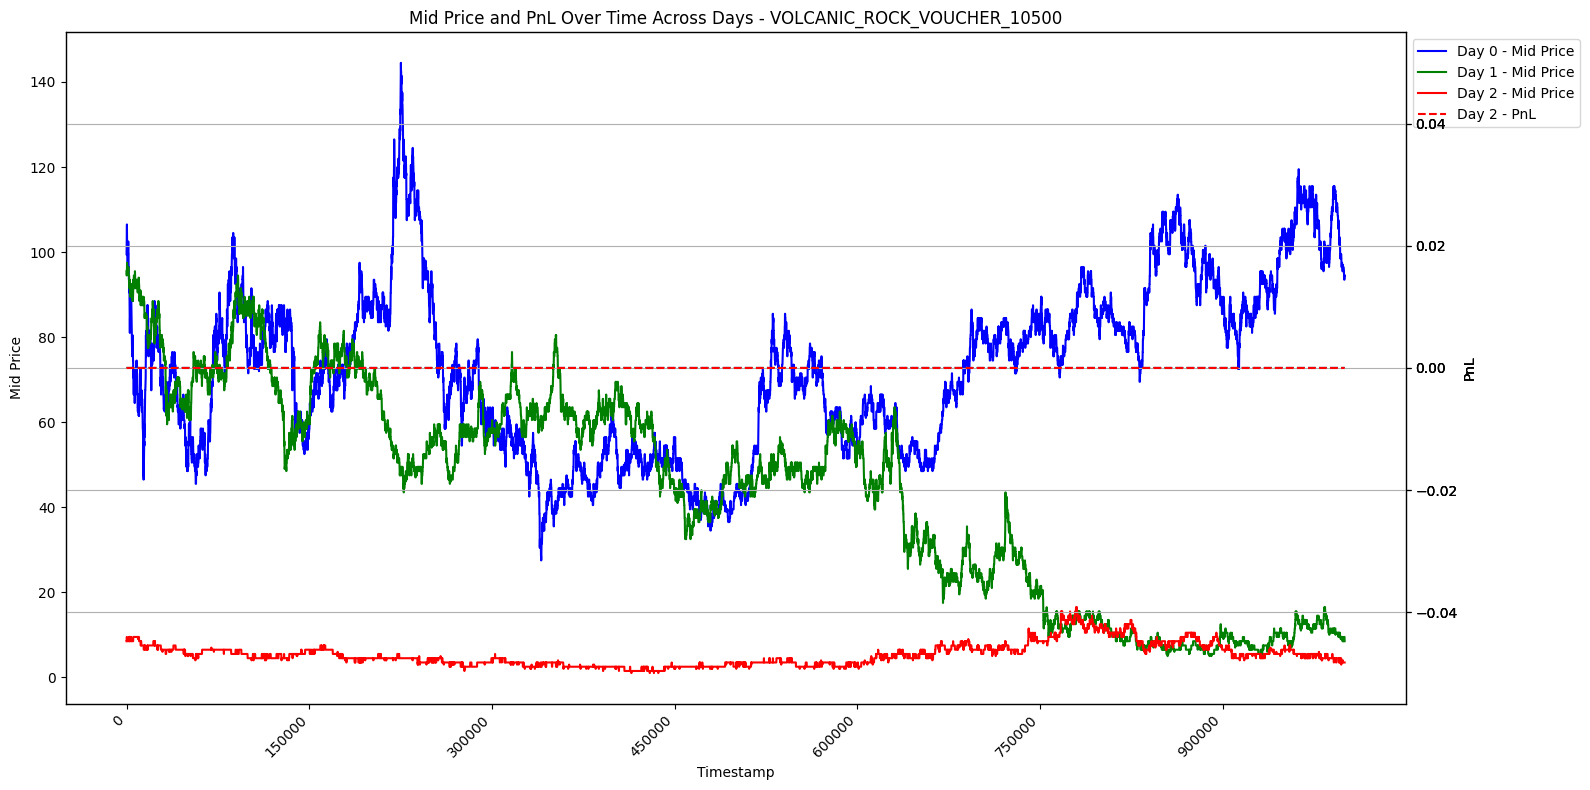

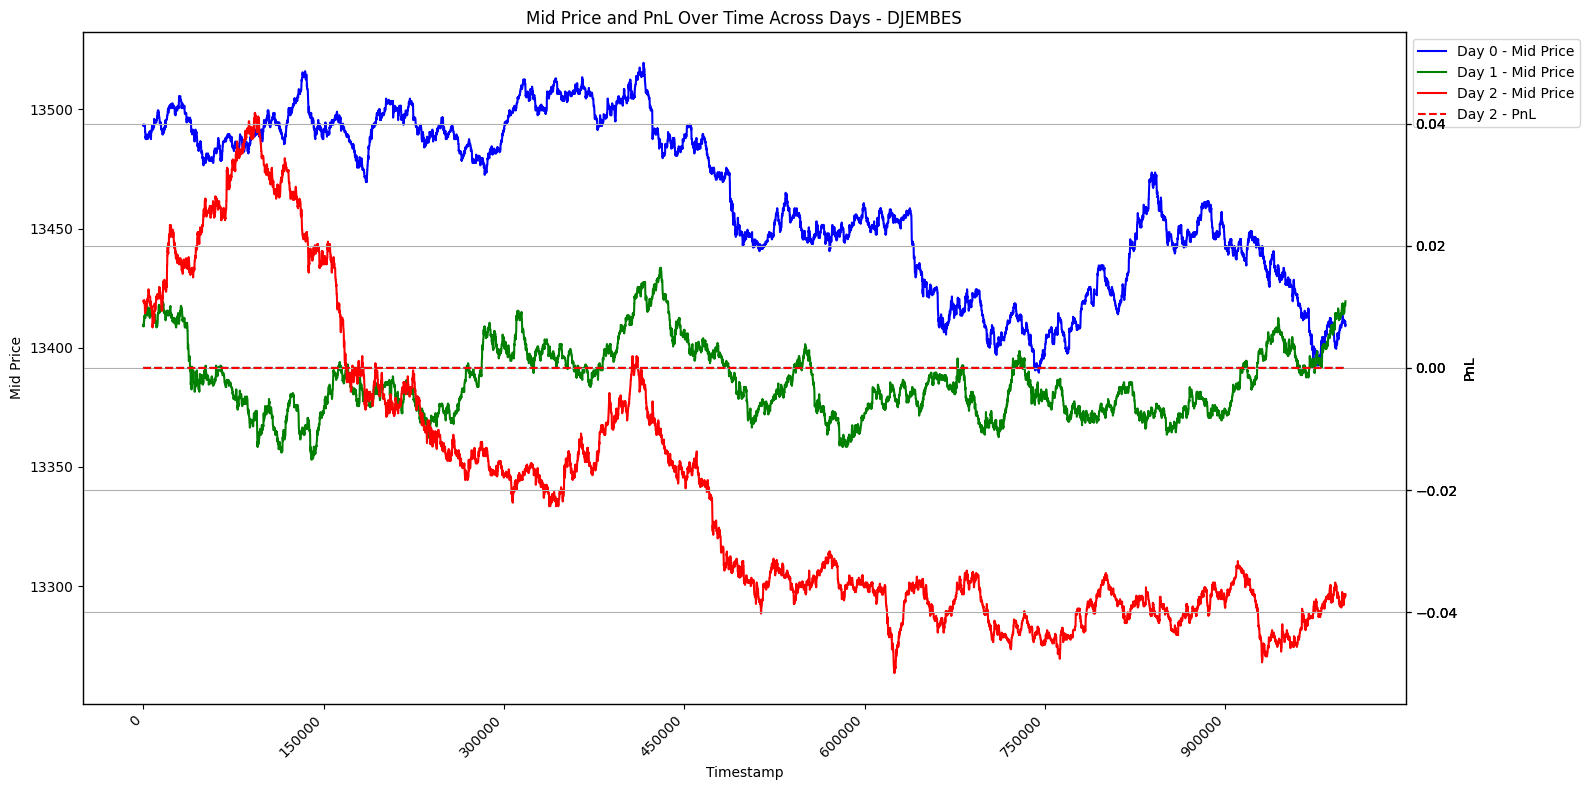

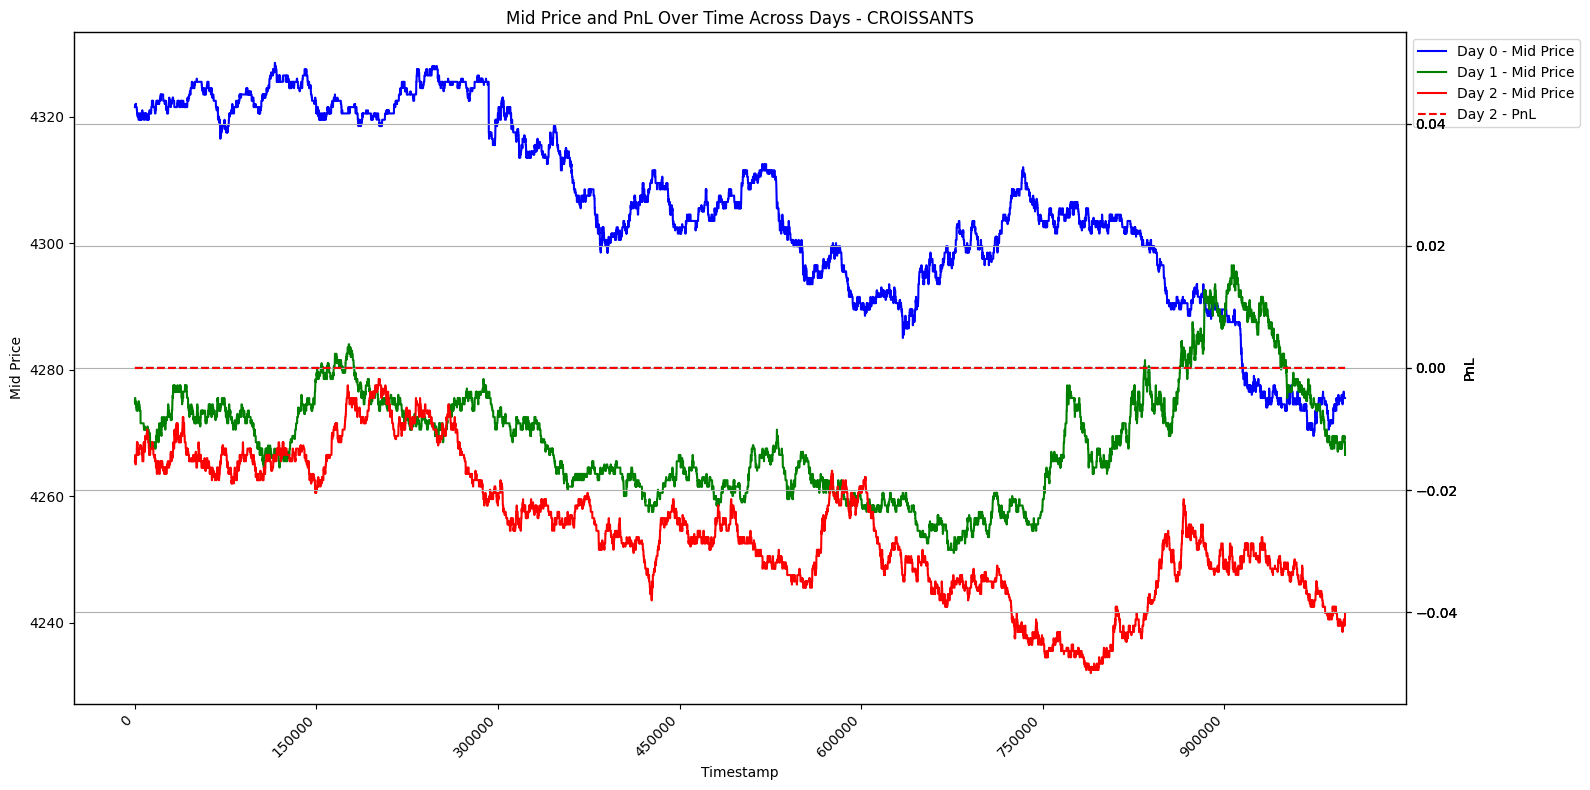

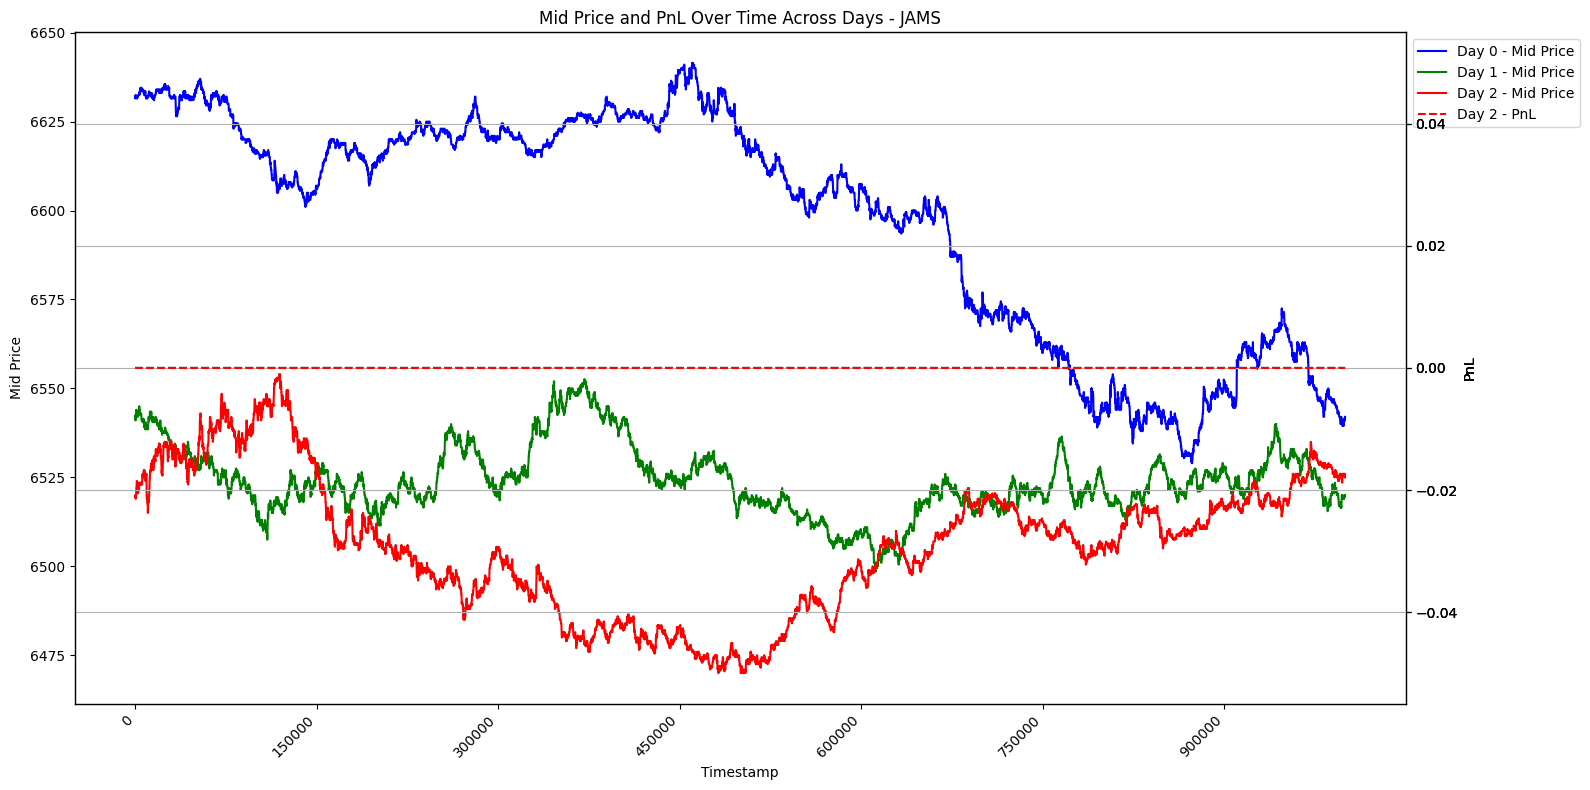

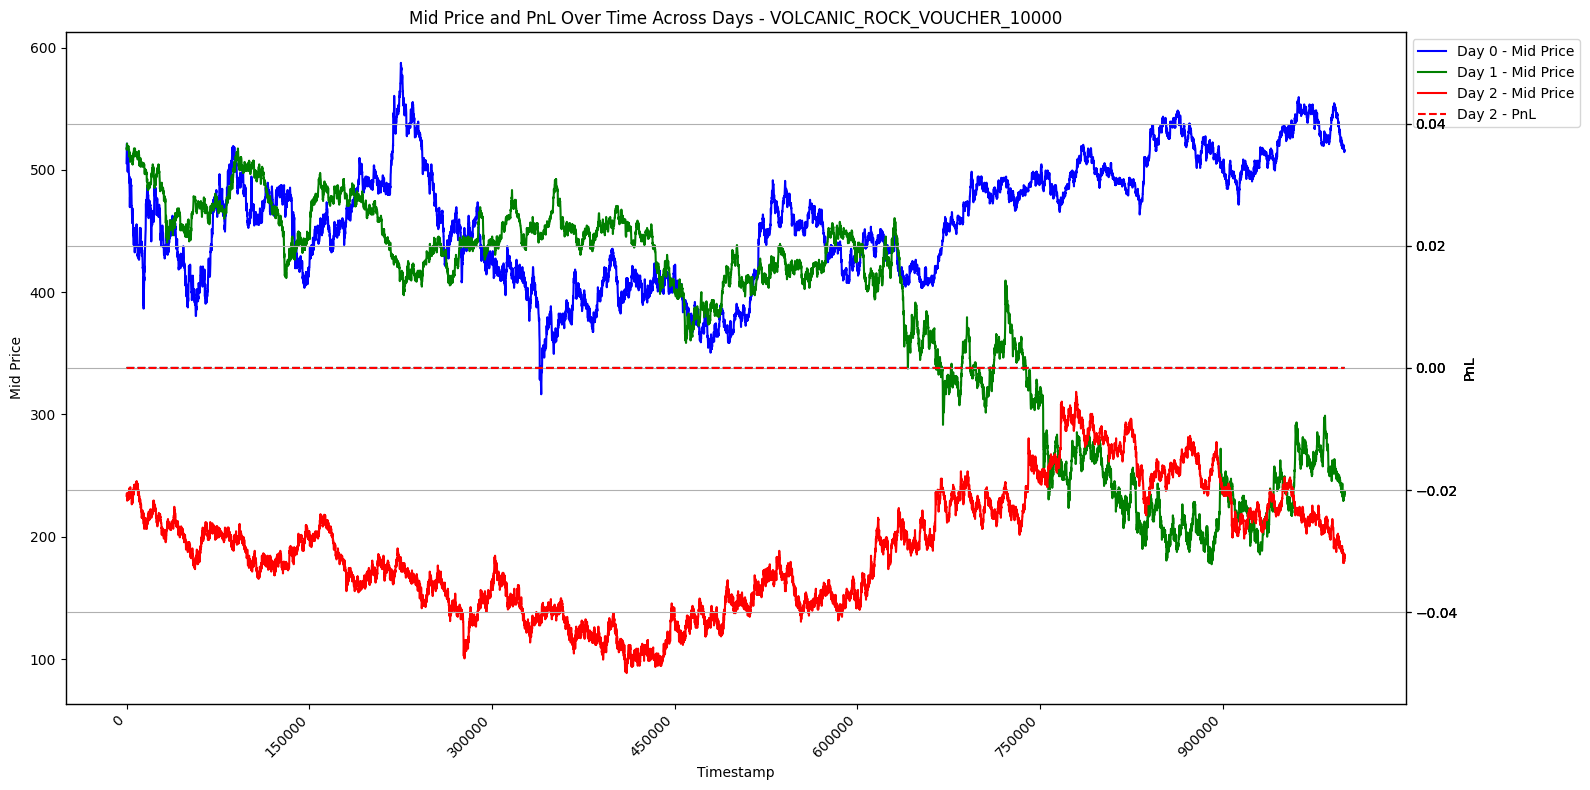

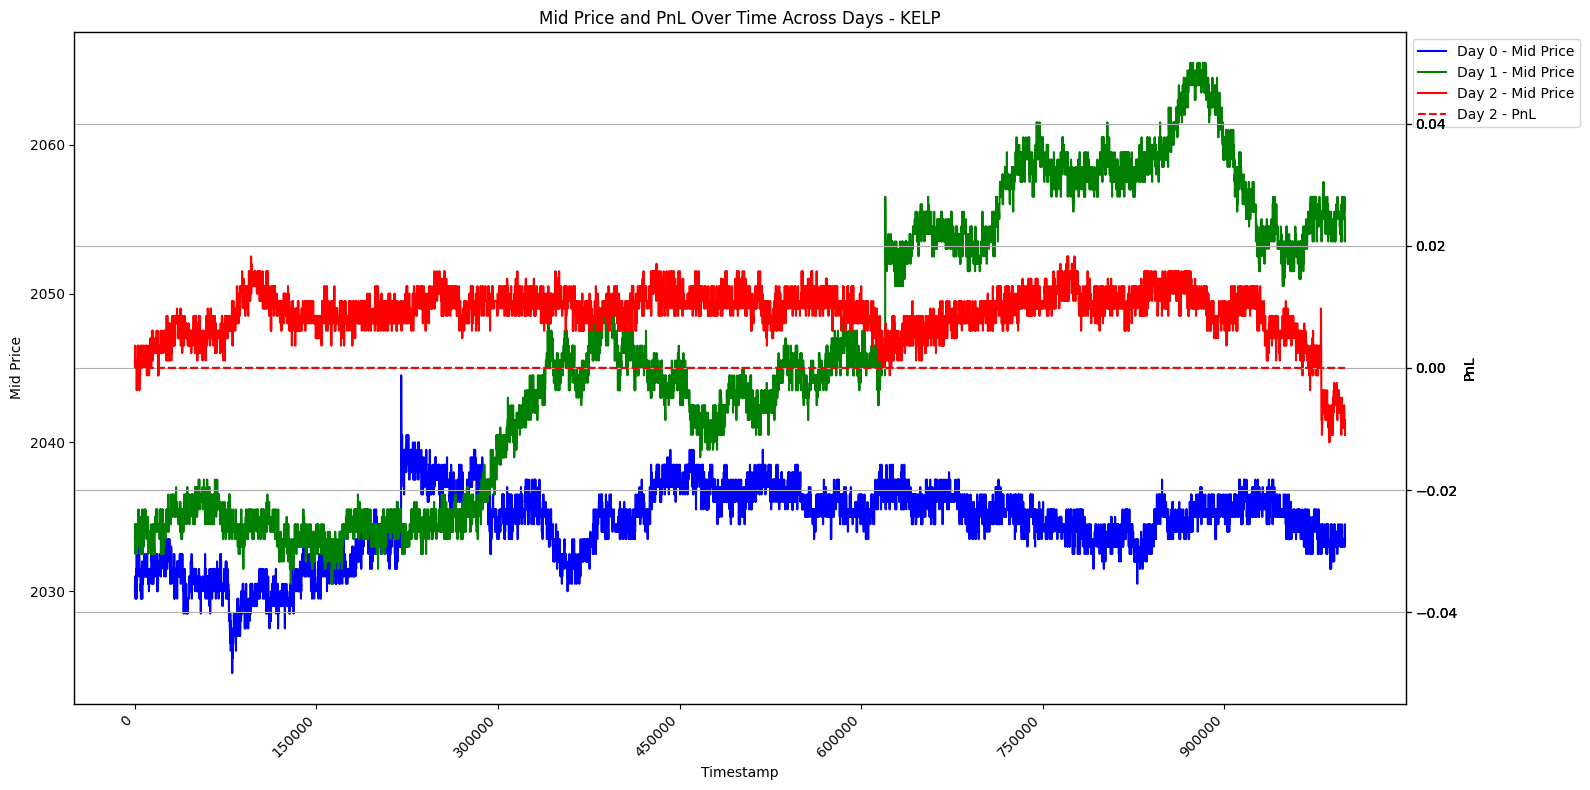

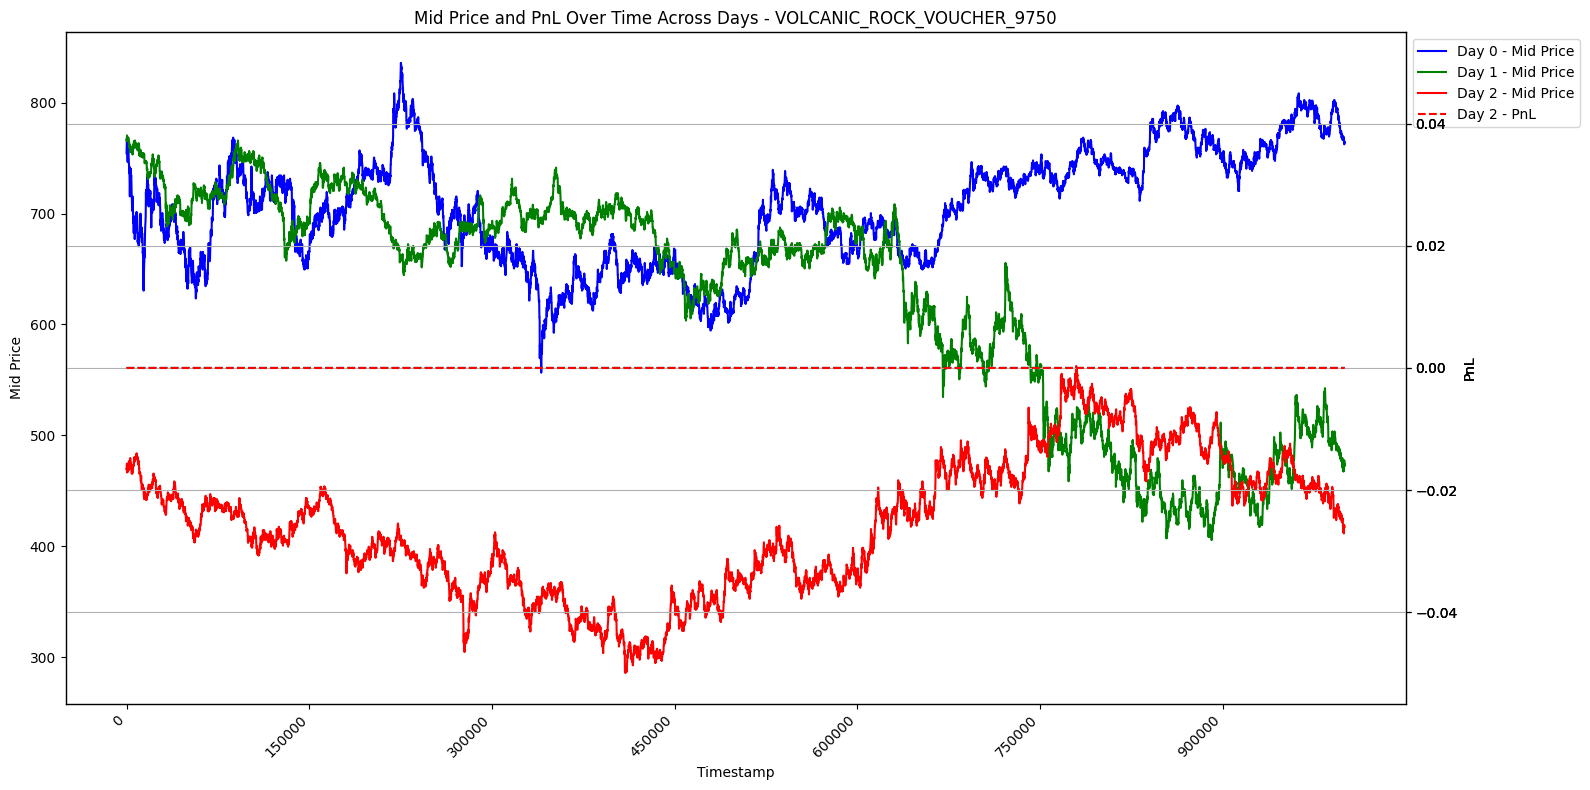

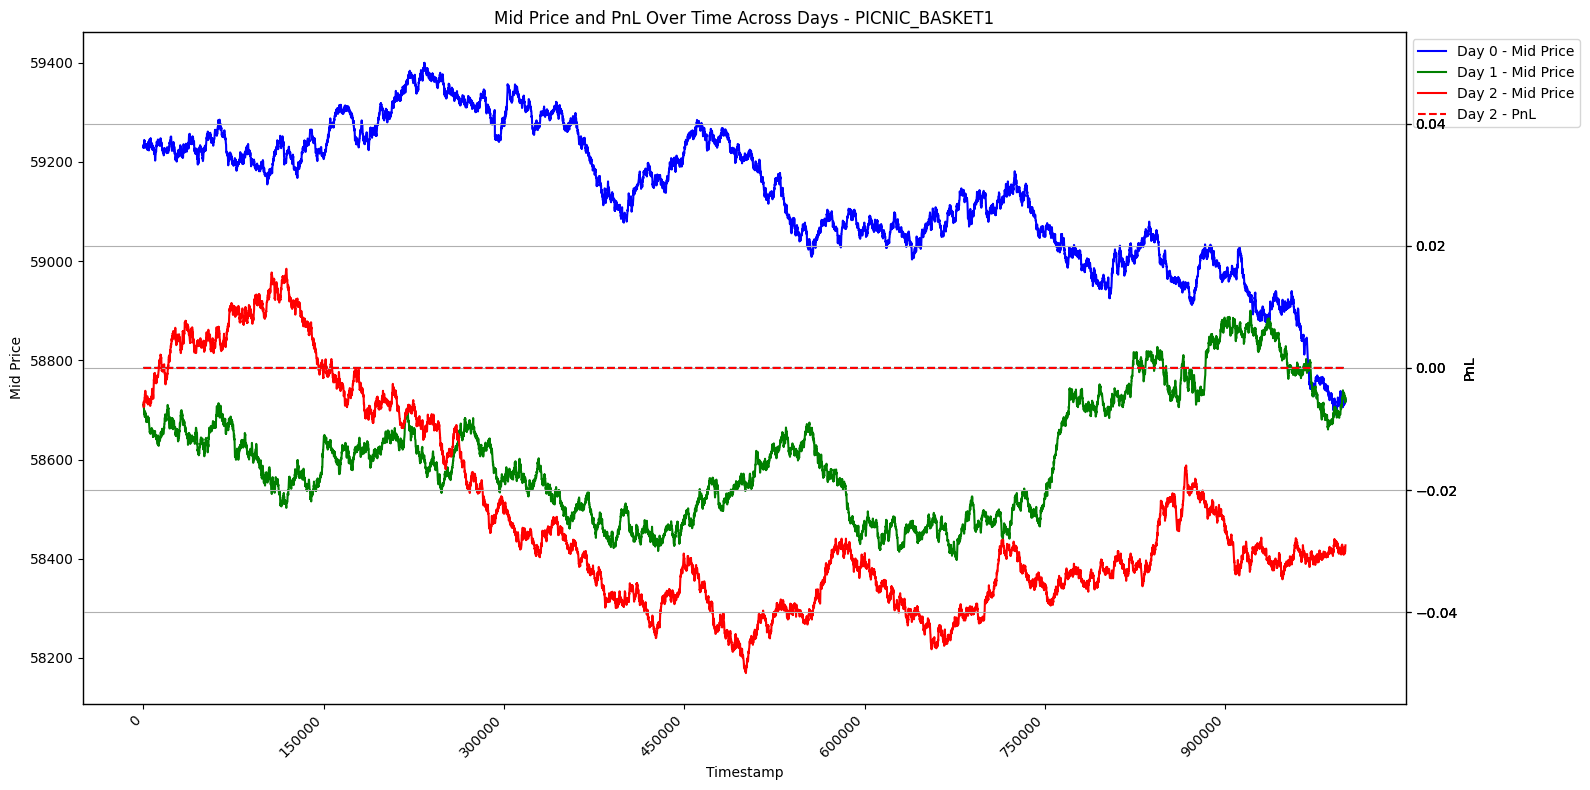

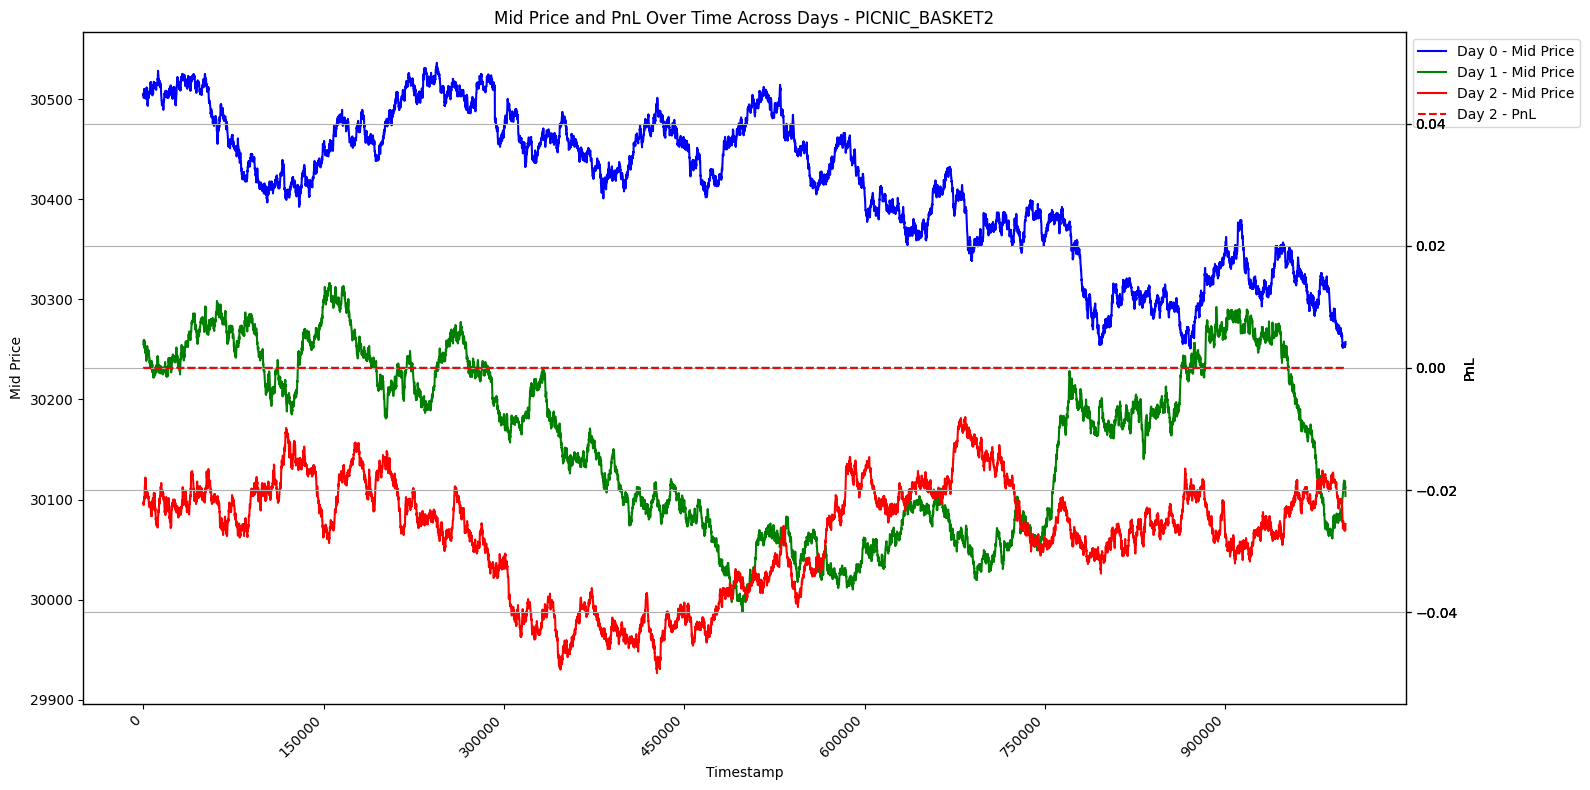

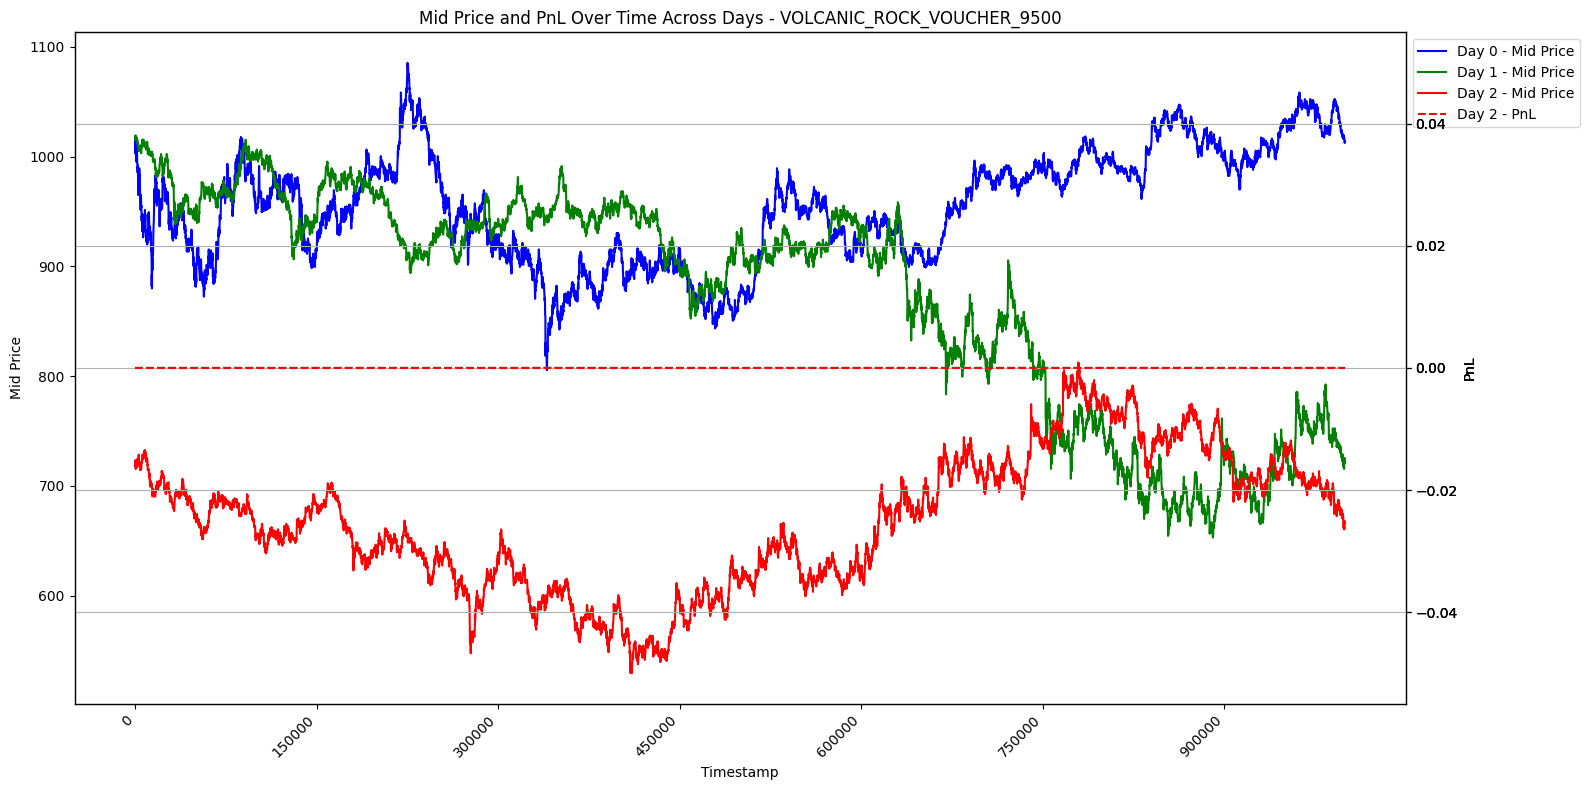

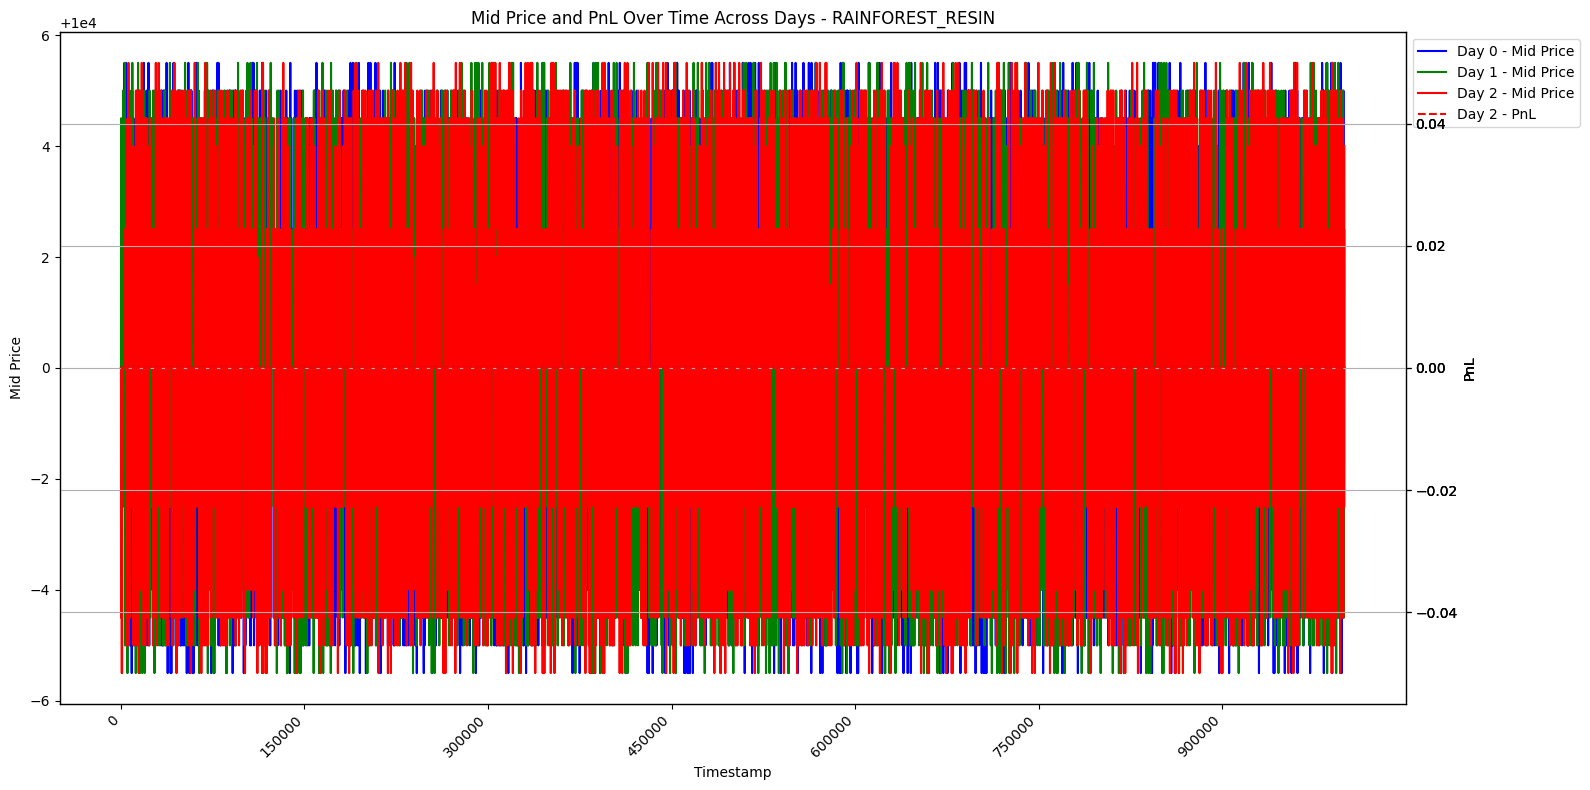

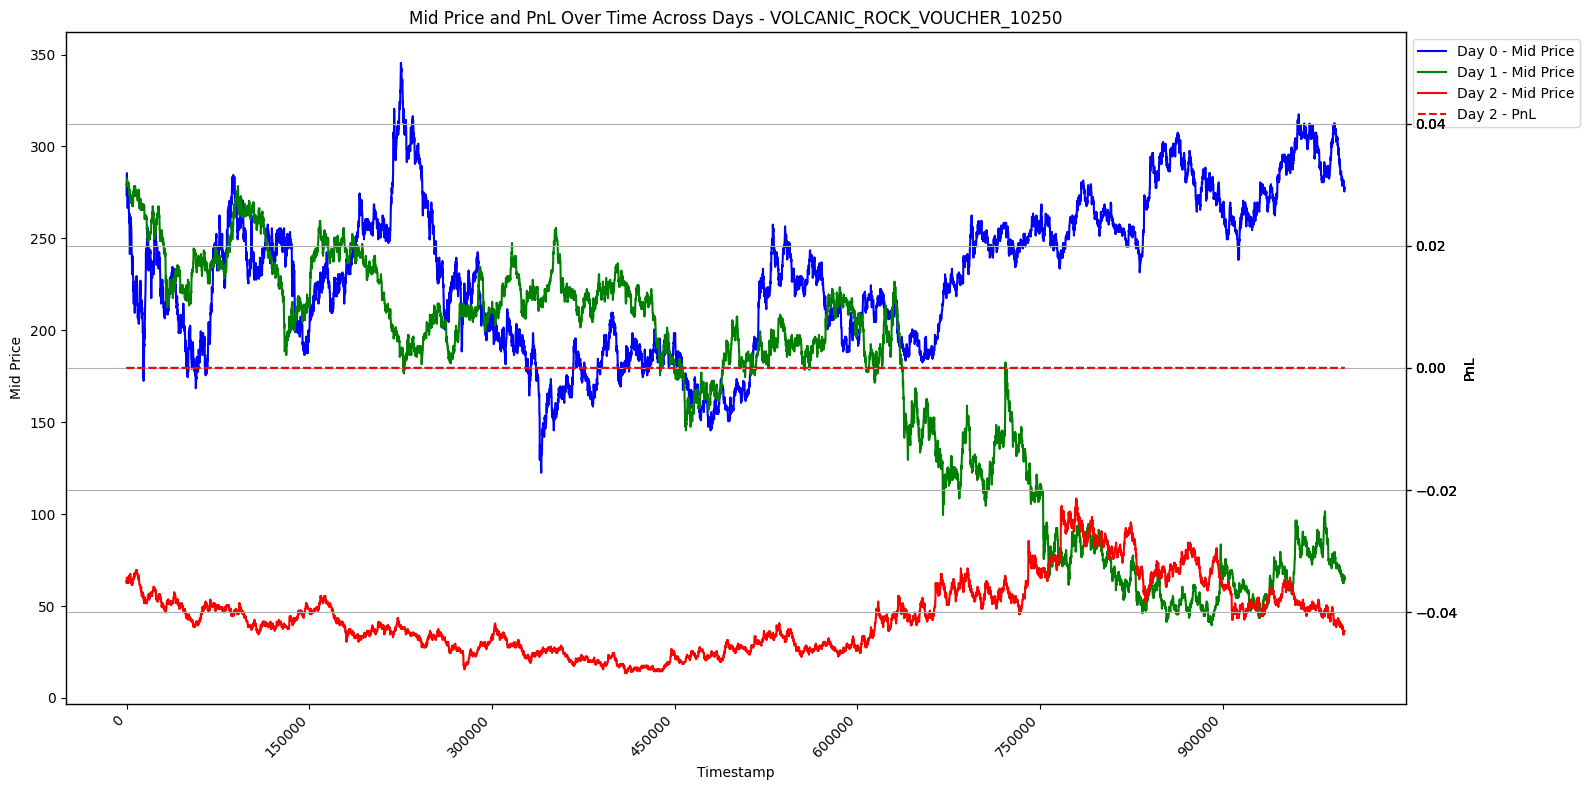

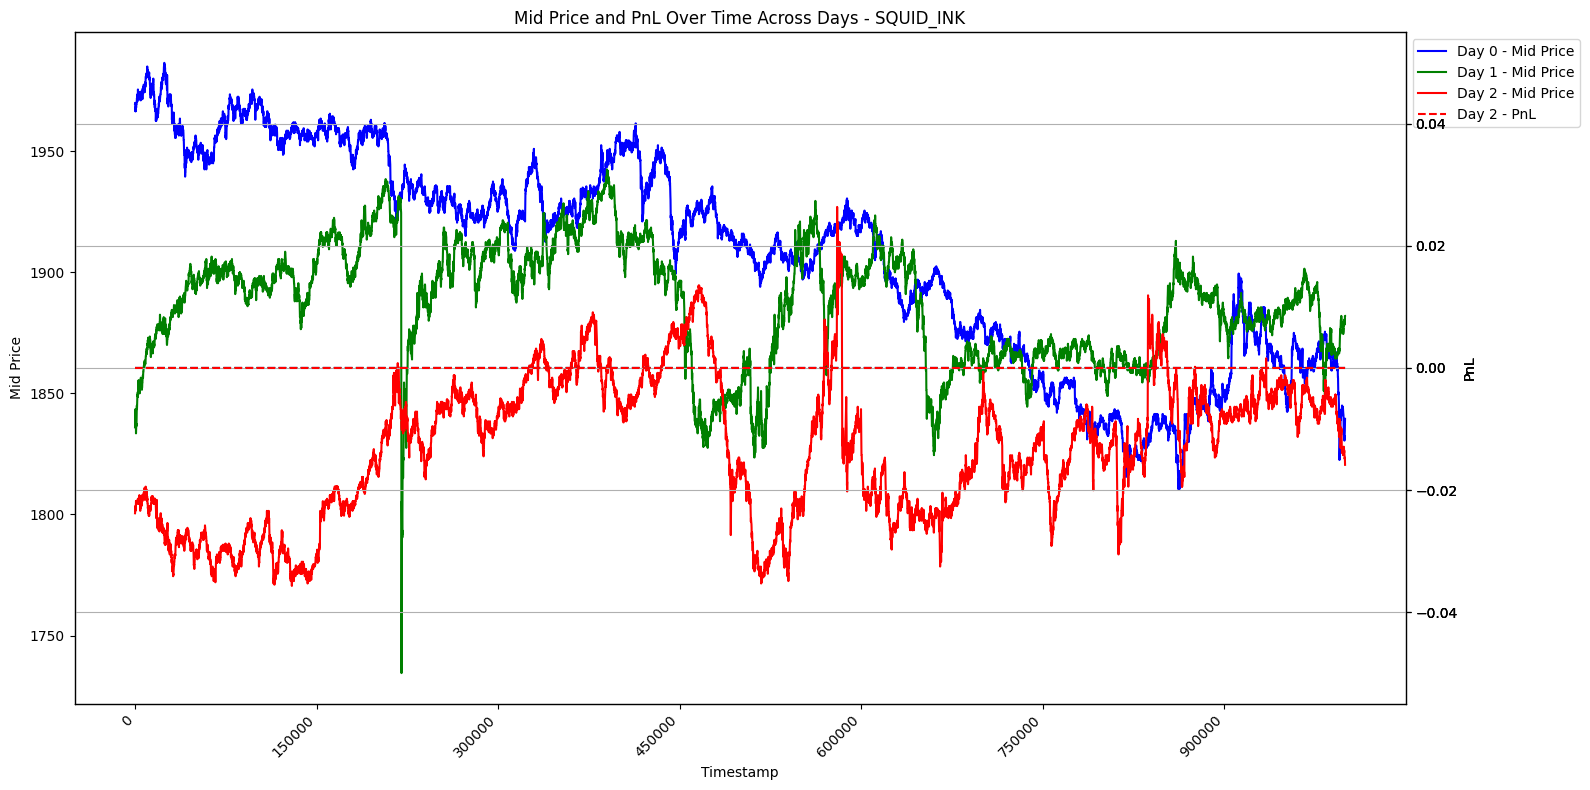

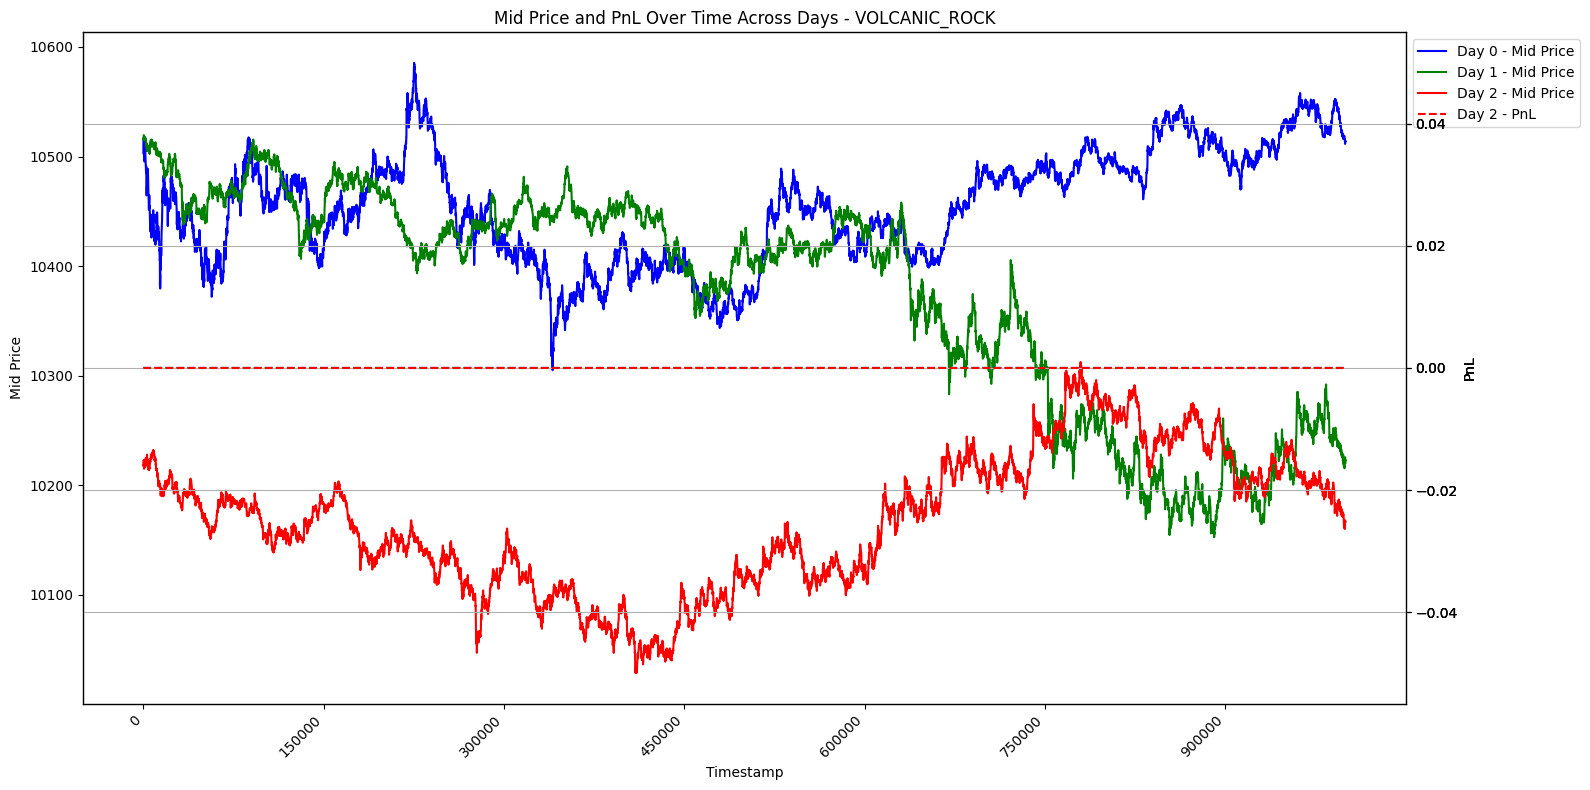

In [2]:
import os
import matplotlib.ticker as ticker

root_path = "../../data/round-3-island-data-bottle/"
days = [0, 1, 2]

# Loading all days into one DataFrame with a 'day' column
def load_all_days_prices_and_pnl():
    dfs = []
    
    for day in days:
        path = os.path.join(root_path, f'prices_round_3_day_{day}.csv')
        df = pd.read_csv(path, sep=';')
        df['day'] = day
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=True)

def plot_product_across_days(df, product):
    fig, ax1 = plt.subplots(figsize=(16, 8))

    colors = ['blue', 'green', 'red']
    
    for day, color in zip(days, colors):
        df_day = df[(df['product'] == product) & (df['day'] == day)]
       
        if df_day.empty:
            continue

        label_price = f'Day {day} - Mid Price'
        label_pnl = f'Day {day} - PnL'

        ax1.plot(df_day['timestamp'], df_day['mid_price'], label=label_price, color=color, linestyle='-')
        ax1.set_ylabel('Mid Price')

        ax2 = ax1.twinx()
        ax2.plot(df_day['timestamp'], df_day['profit_and_loss'], label=label_pnl, color=color, linestyle='--')
        ax2.set_ylabel('PnL')

    # X-axis formatting
    ax1.set_xlabel('Timestamp')
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

    # Combining legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.0, 1.0))

    plt.title(f'Mid Price and PnL Over Time Across Days - {product}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

df_all = load_all_days_prices_and_pnl()

for product in df_all['product'].unique():
    plot_product_across_days(df_all, product)

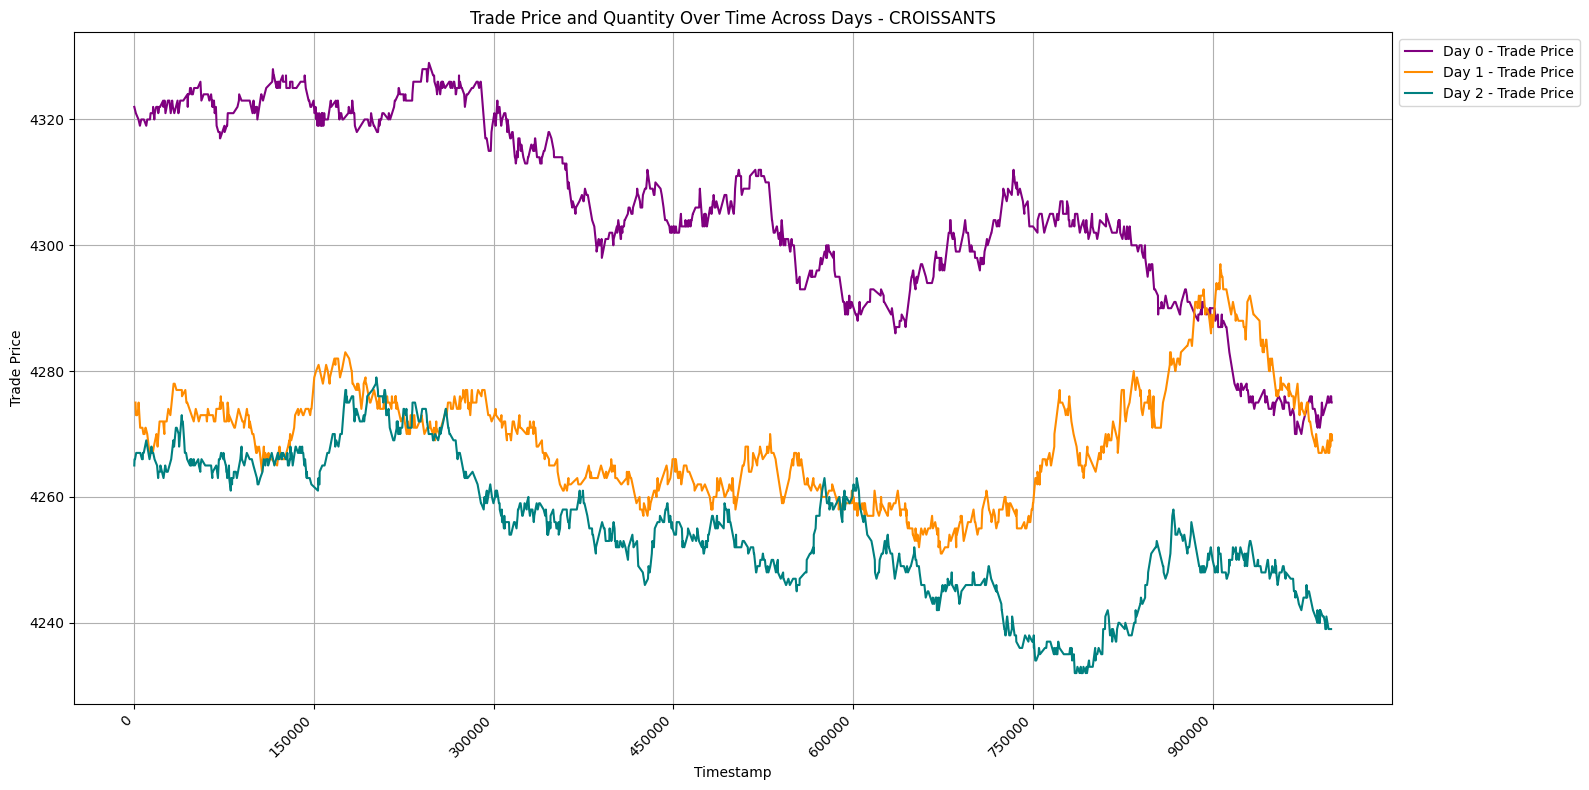

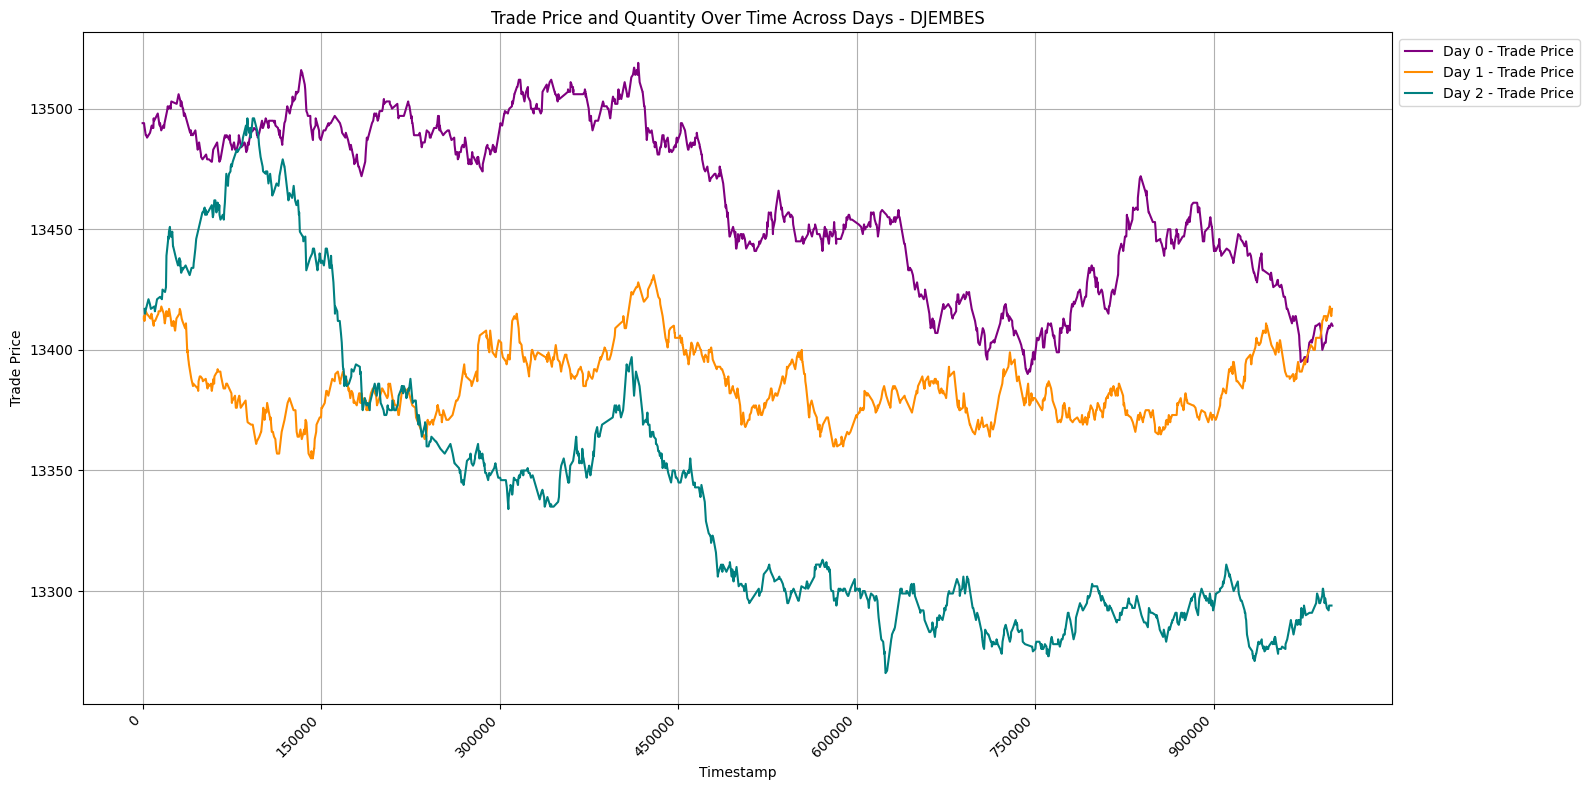

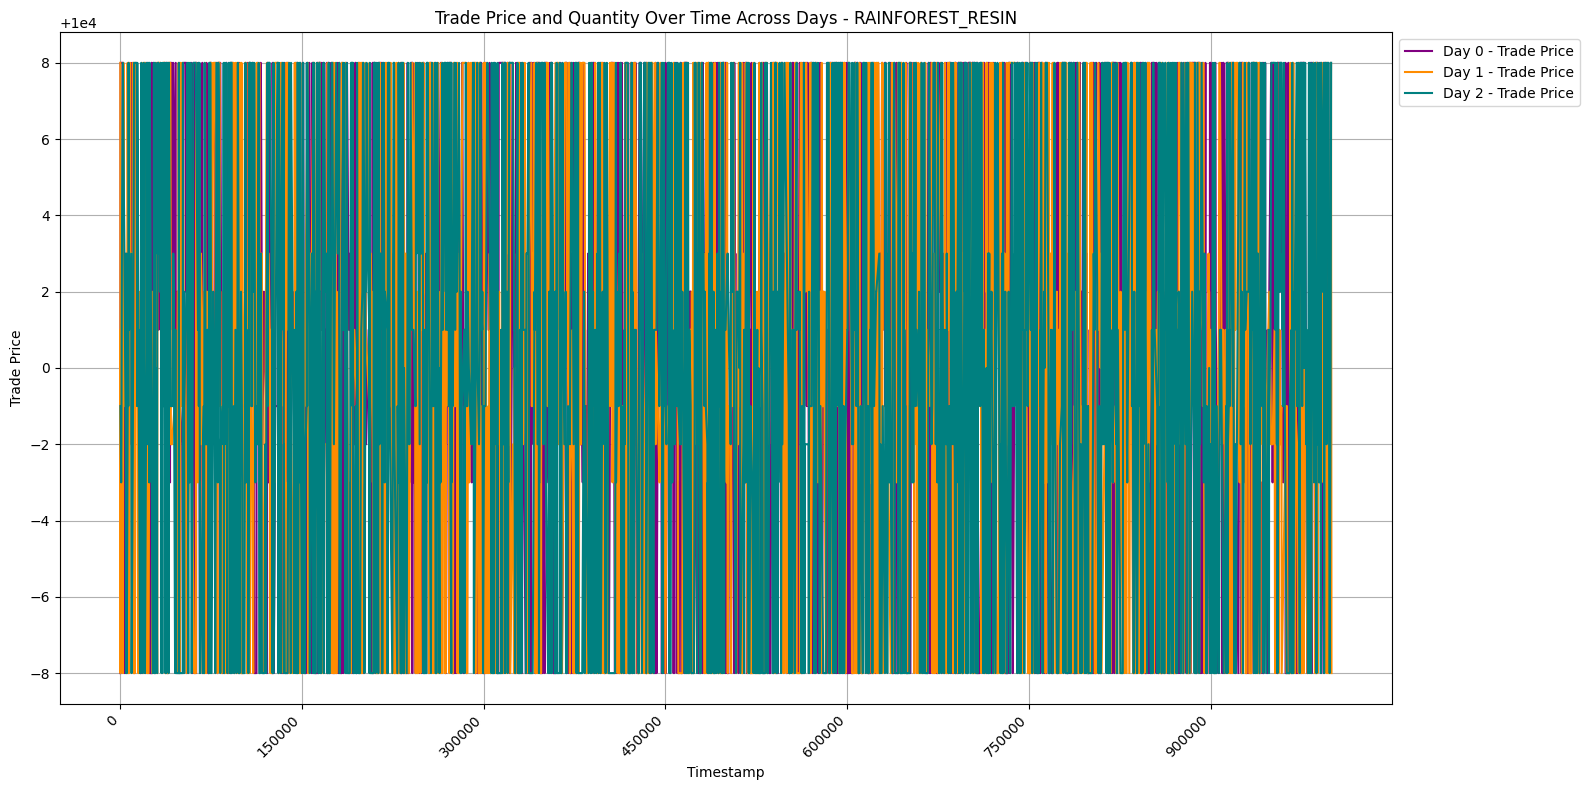

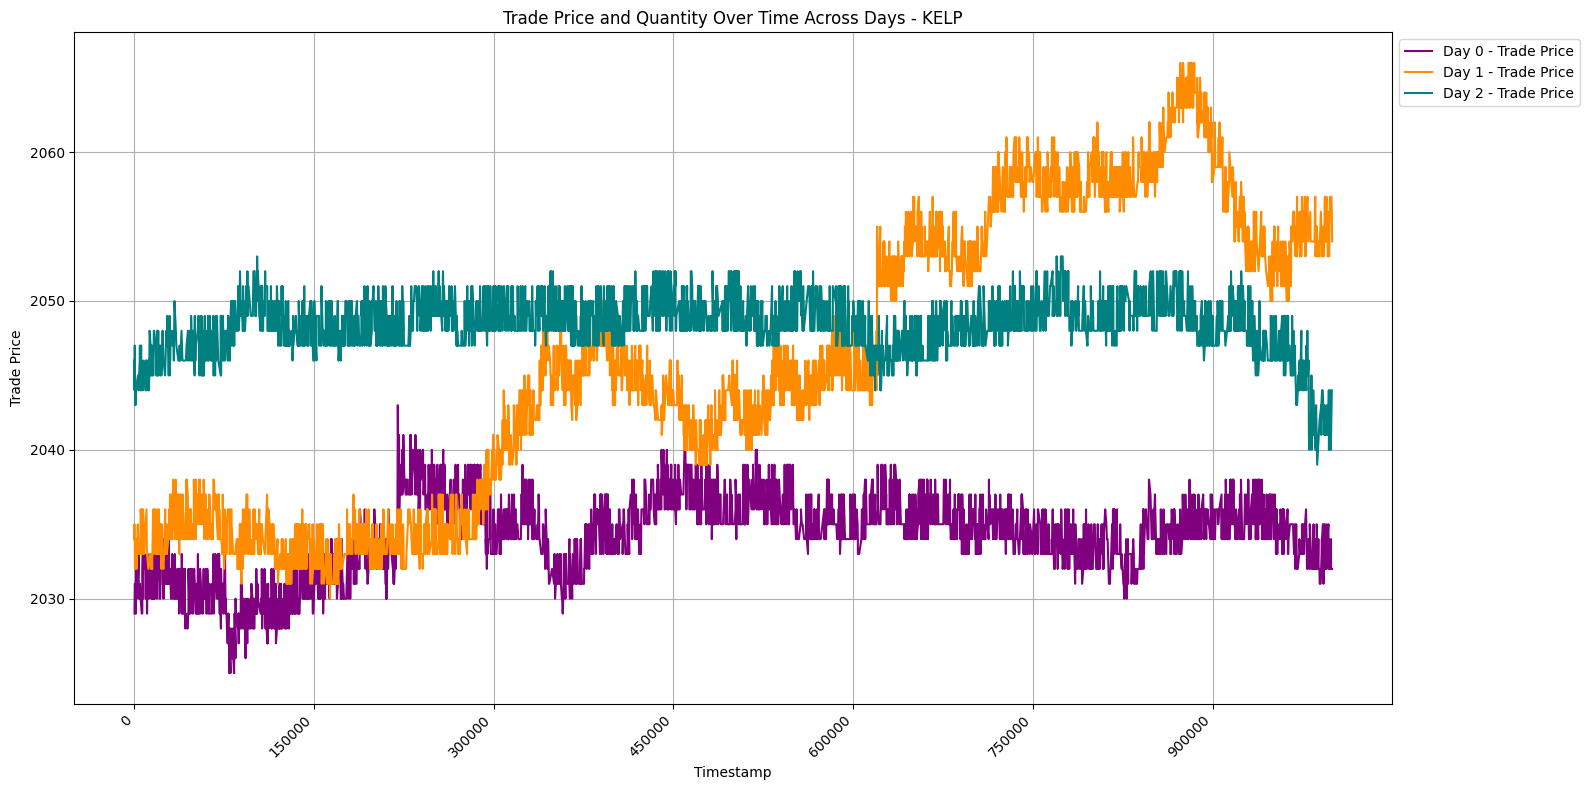

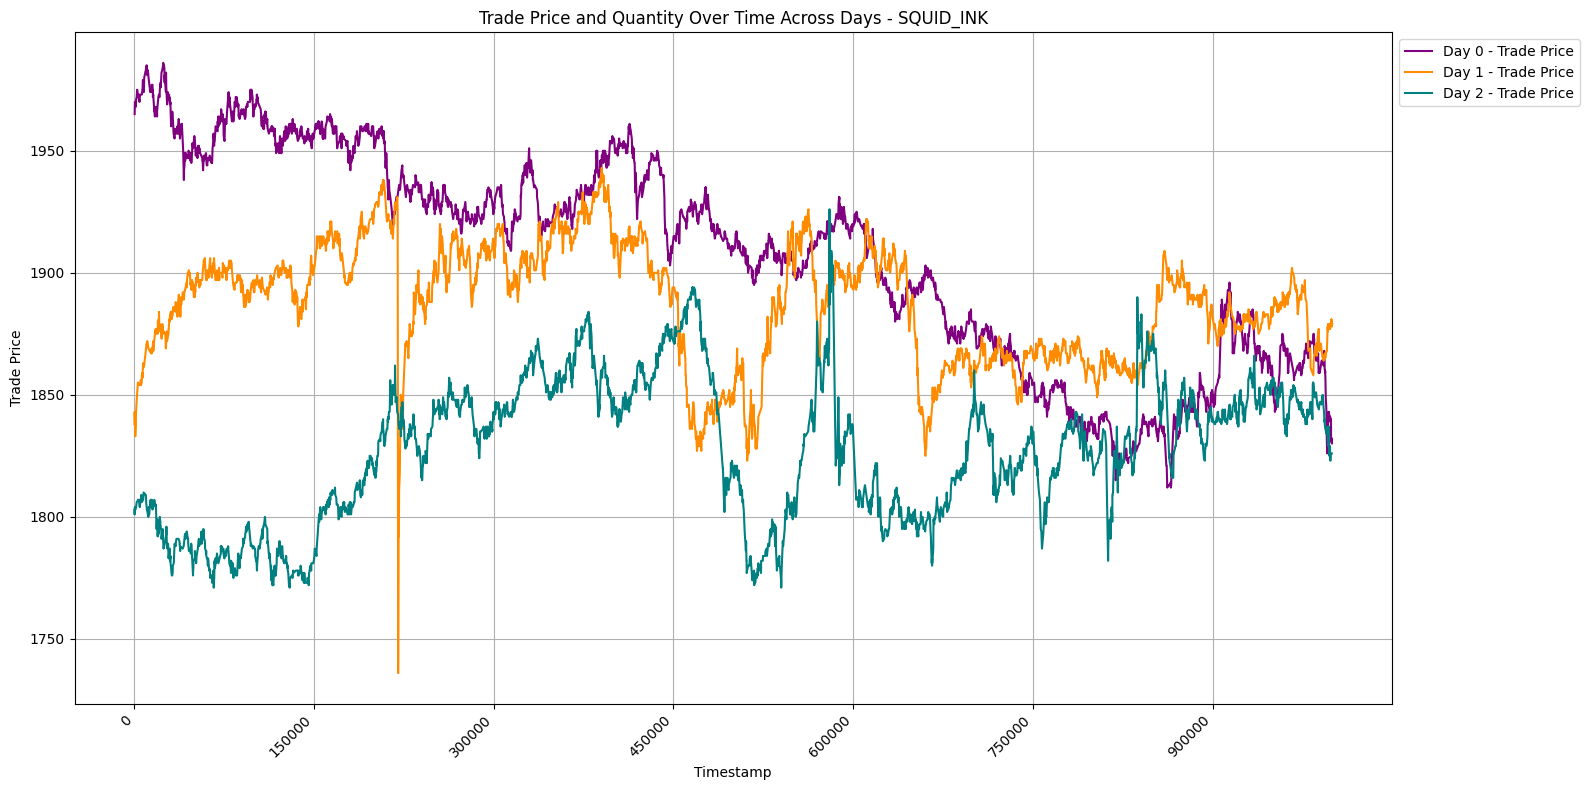

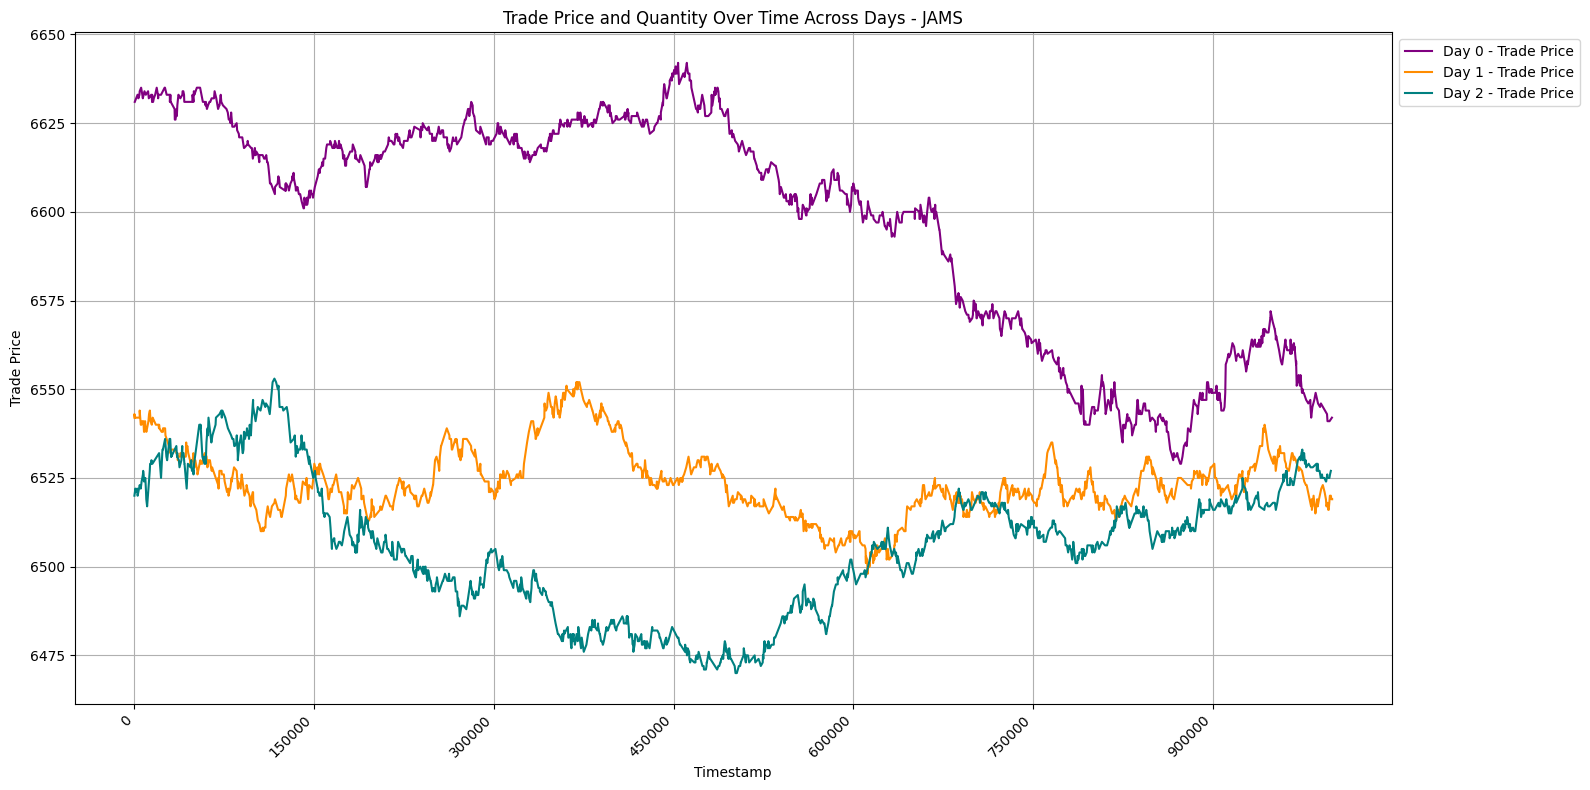

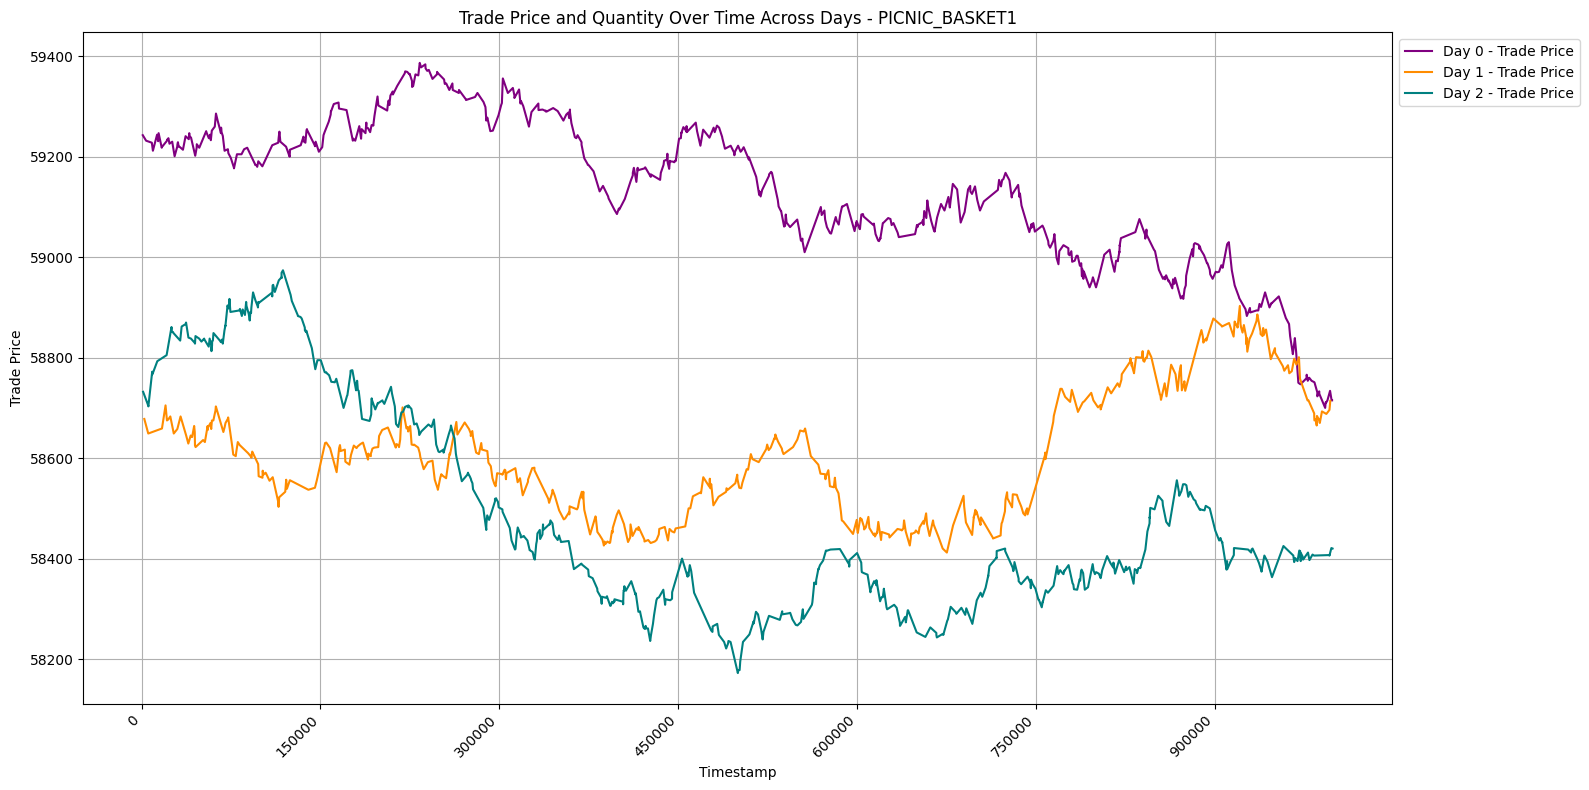

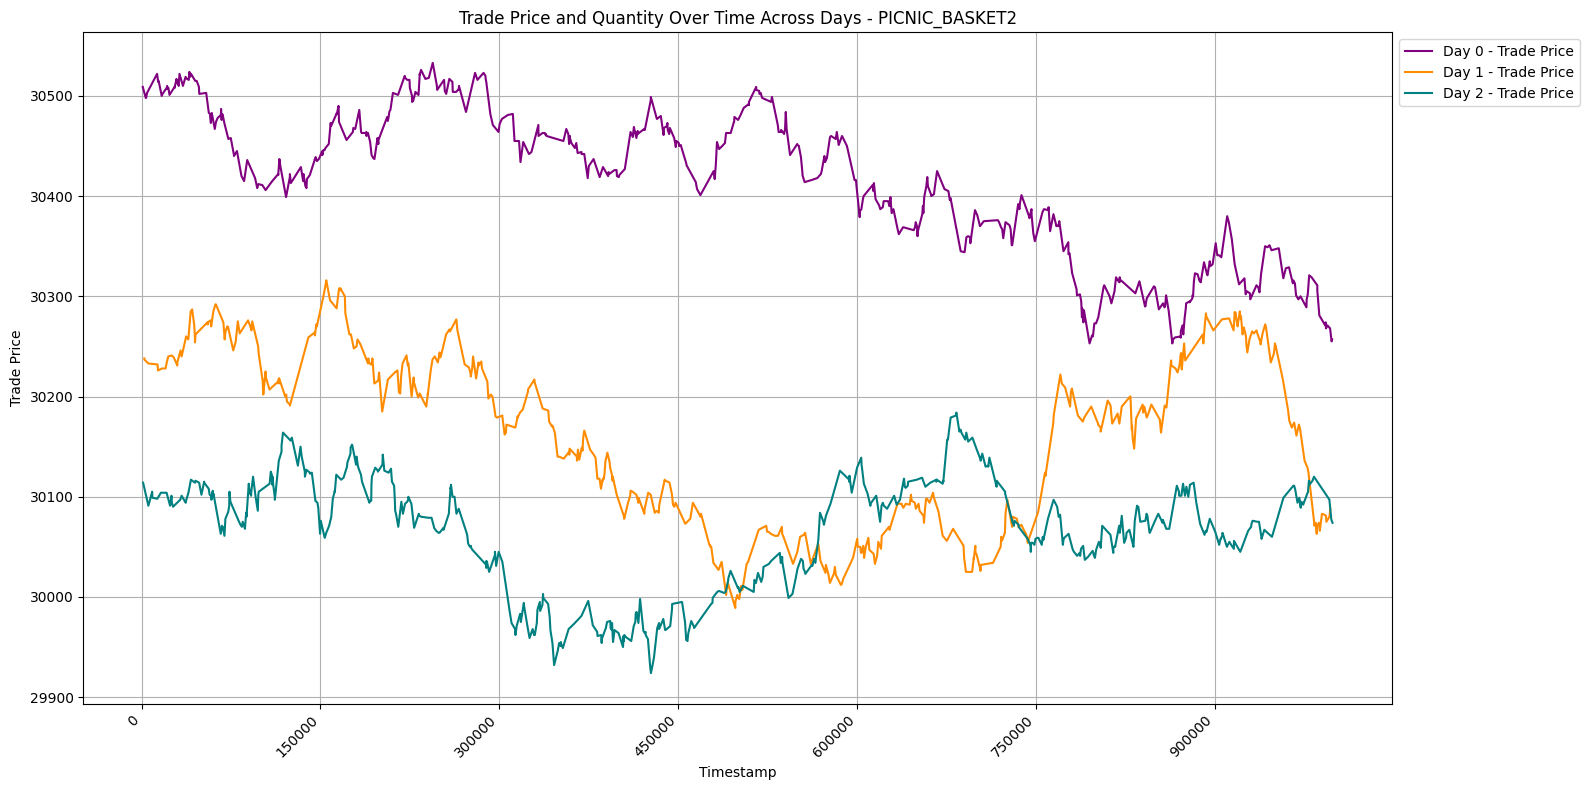

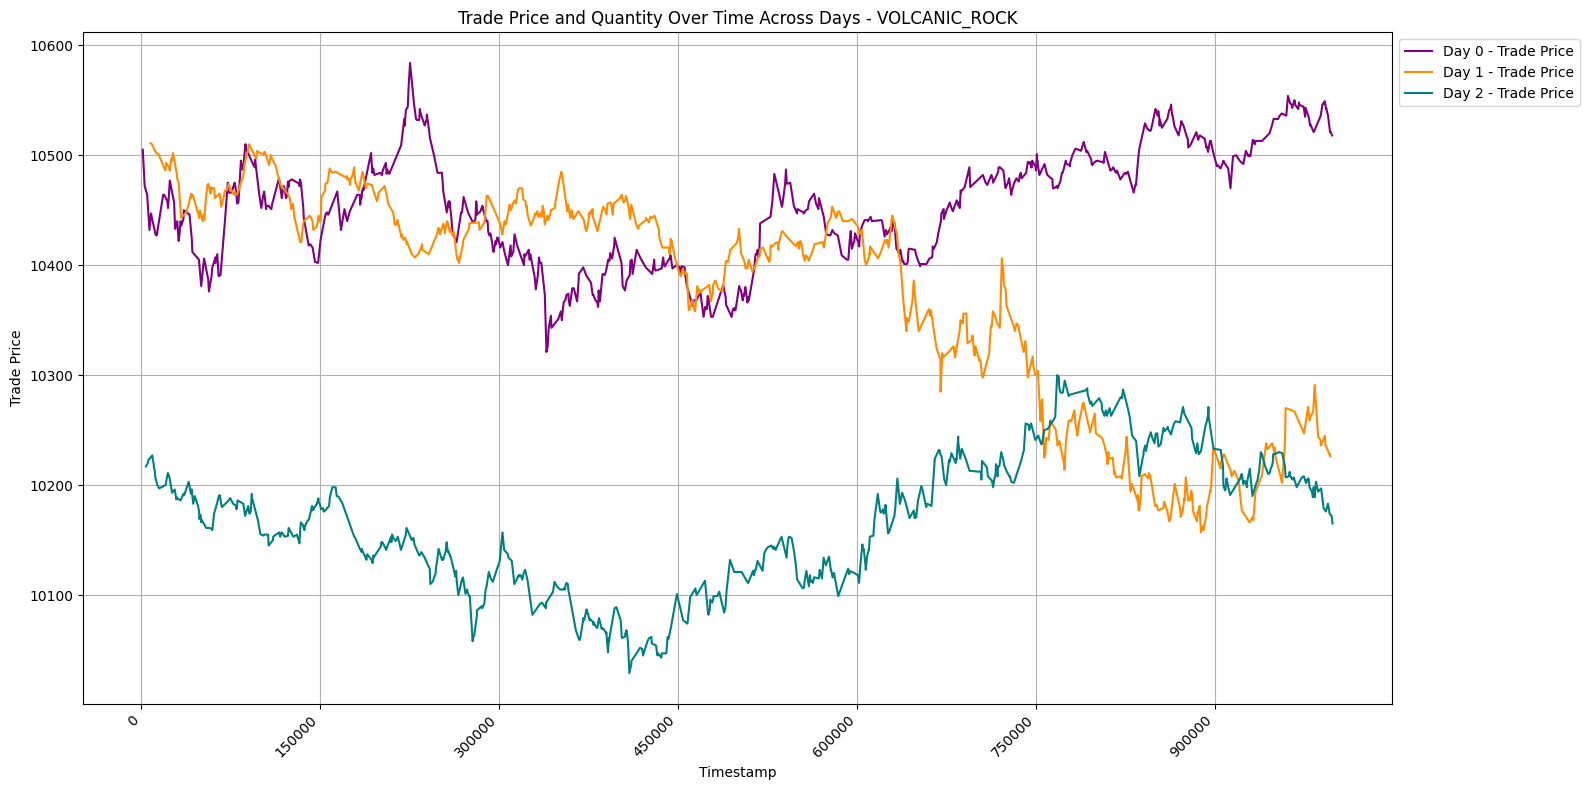

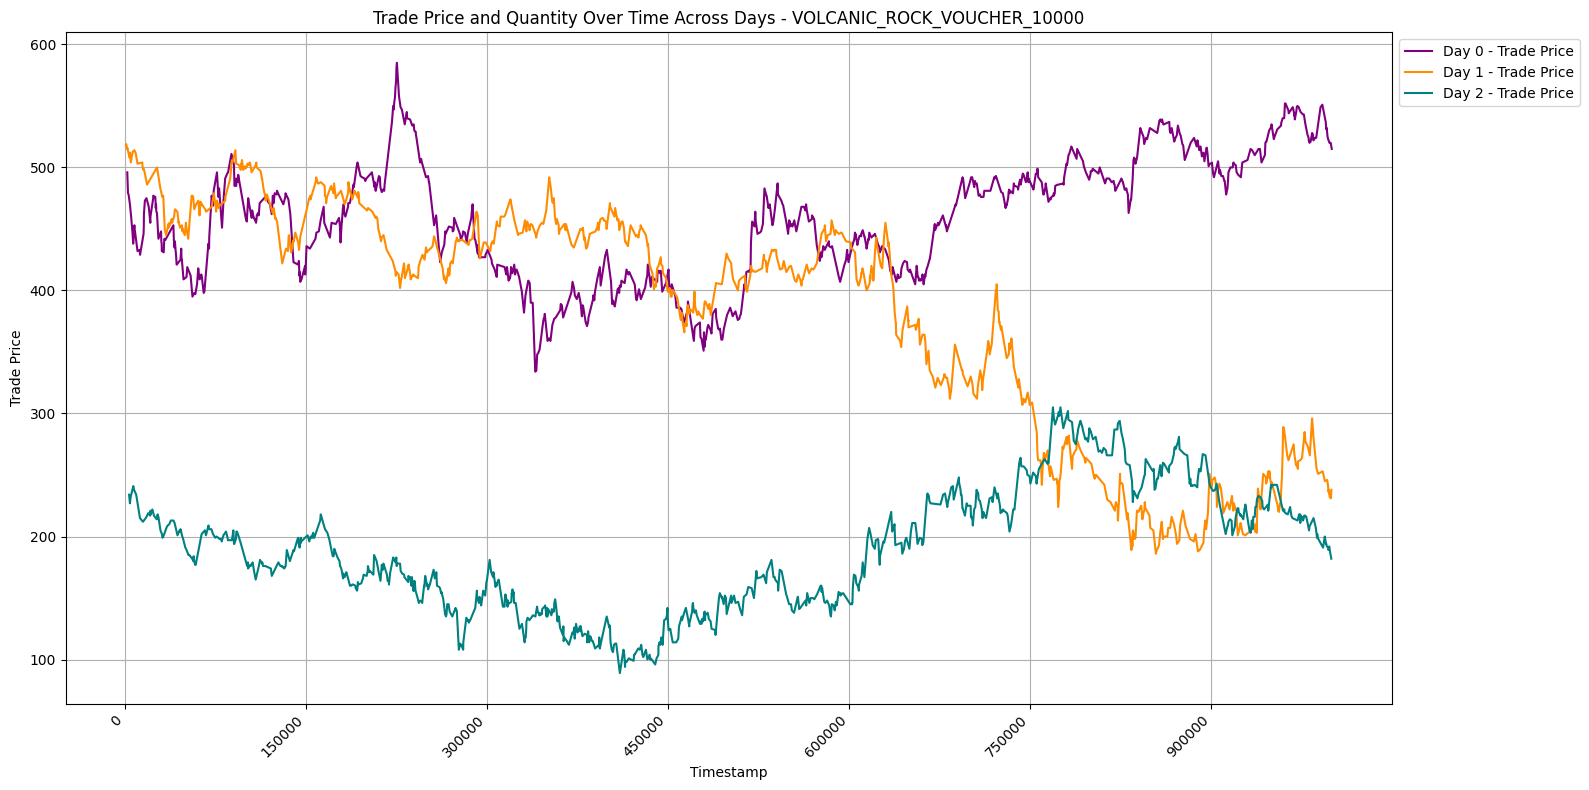

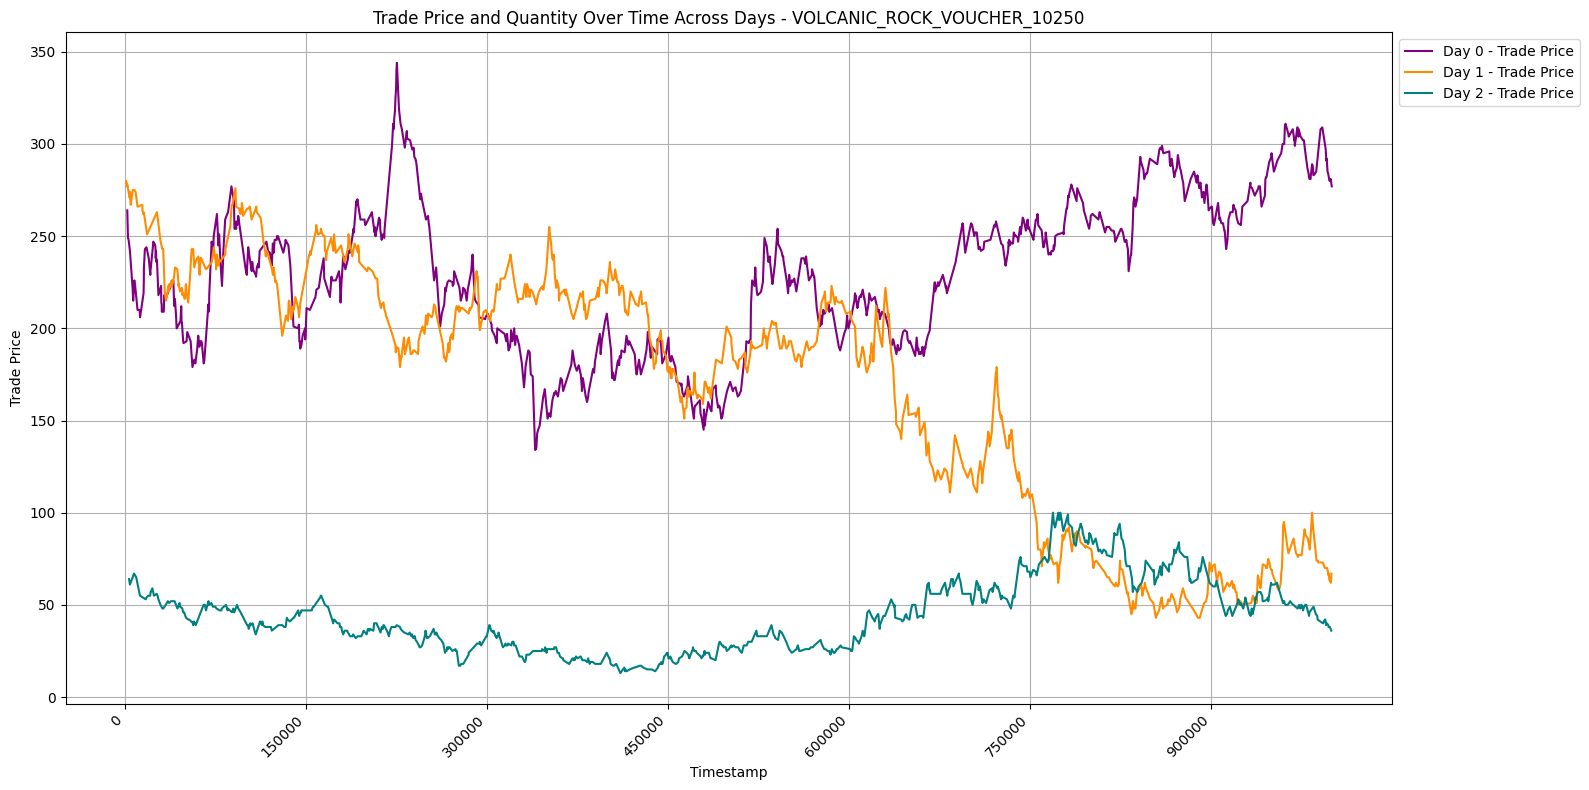

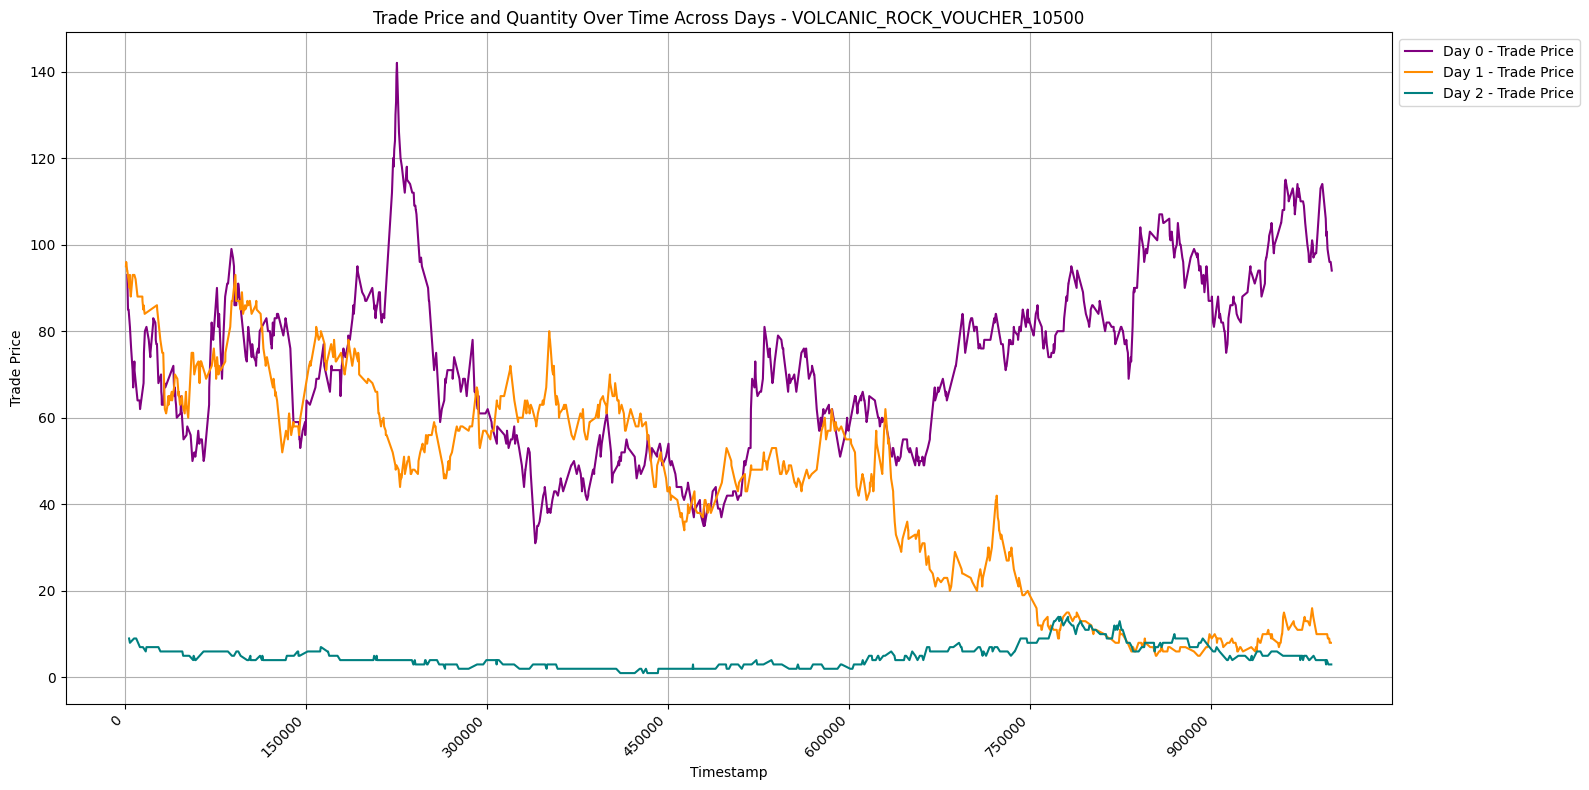

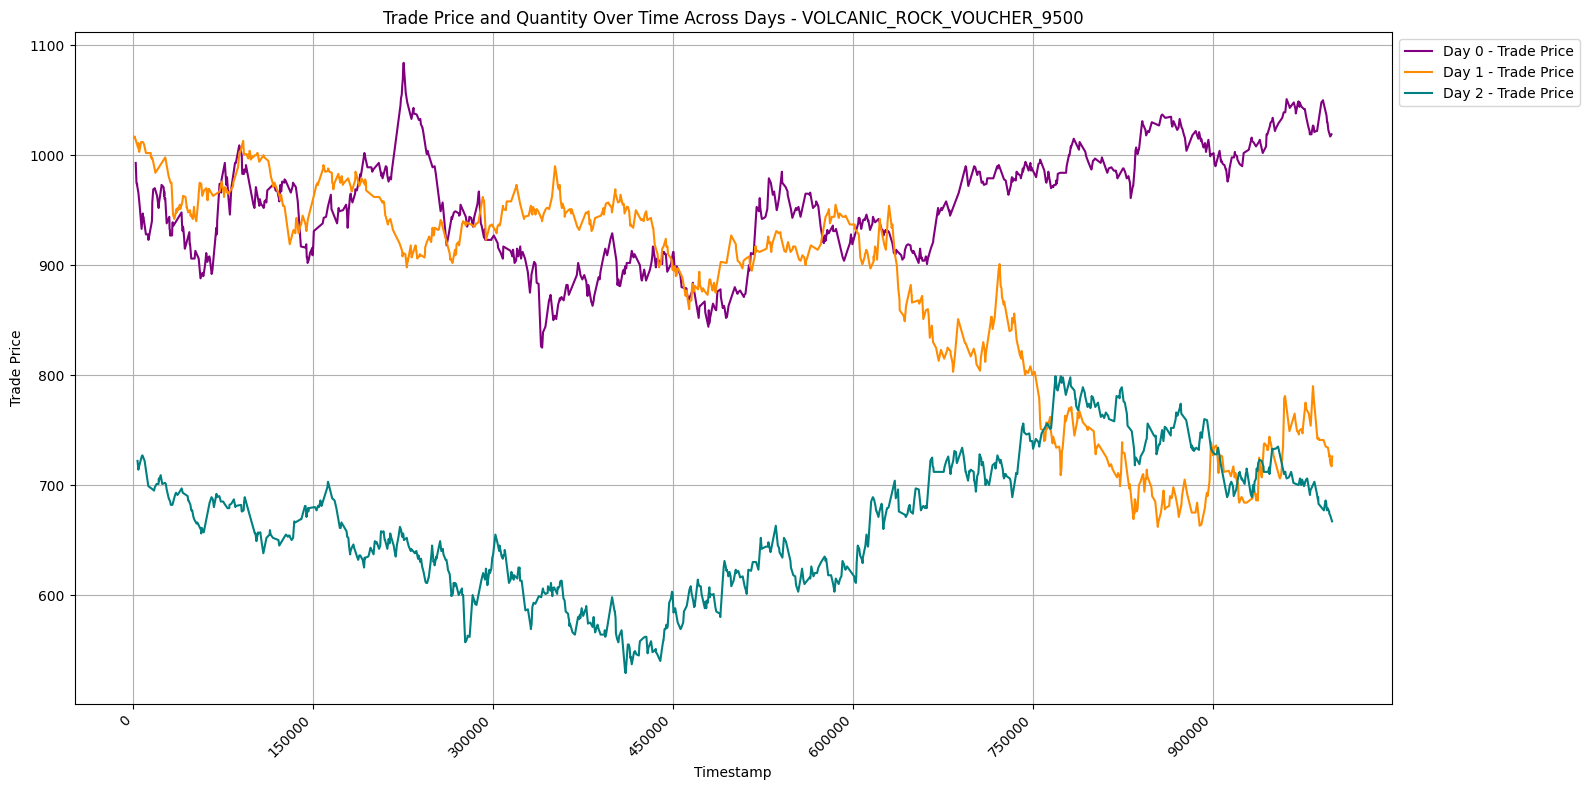

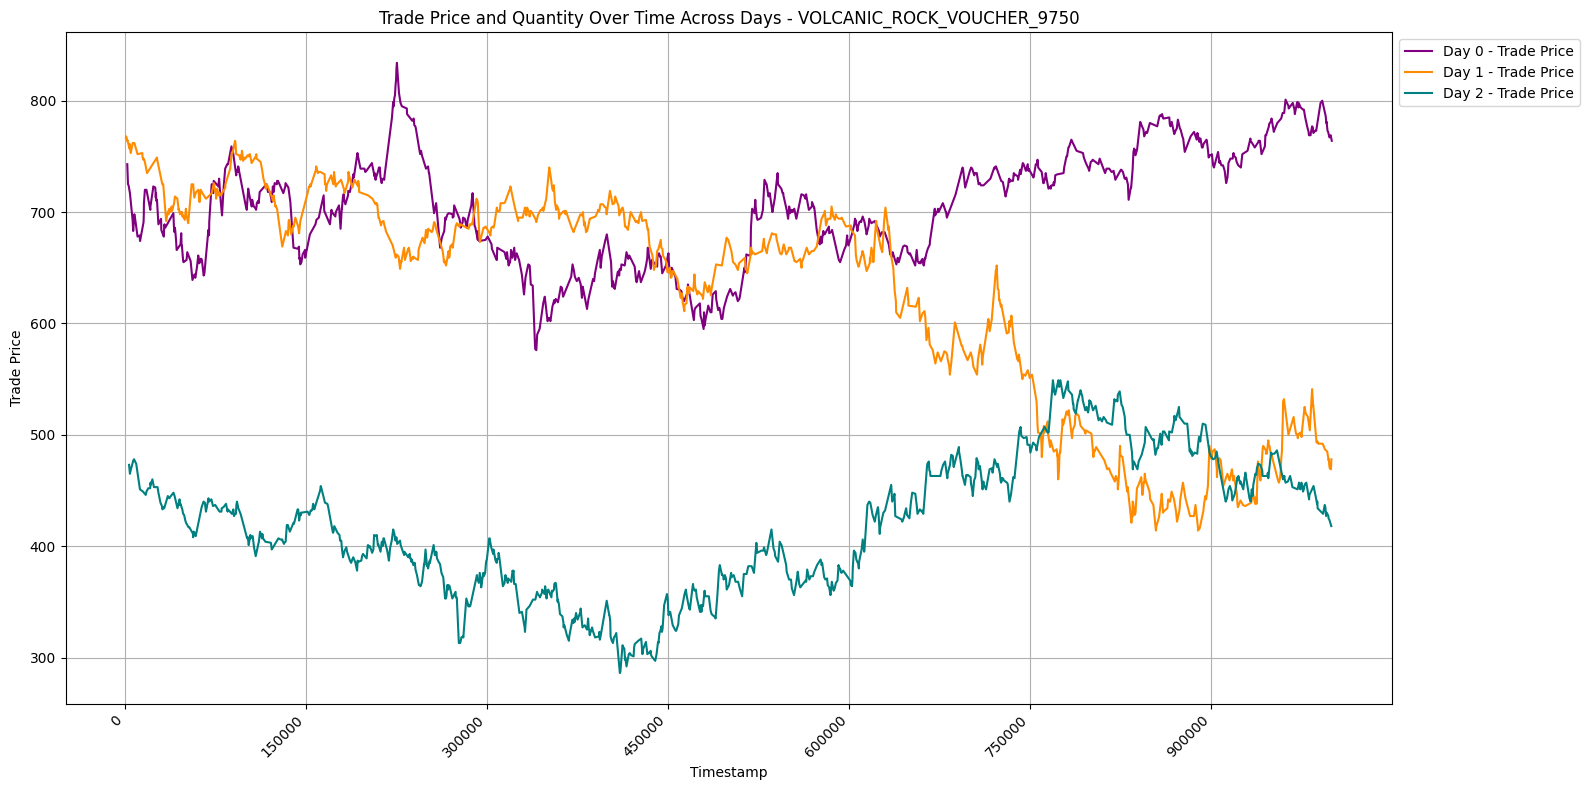

In [6]:
root_path = "../../data/round-3-island-data-bottle/"
days = [0, 1, 2]

def load_all_days_trades():
    dfs = []

    for day in days:
        path = os.path.join(root_path, f'trades_round_3_day_{day}.csv')
        df = pd.read_csv(path, sep=';')
        df['day'] = day
        dfs.append(df)

    return pd.concat(dfs, ignore_index=True)

def plot_trades_across_days(df, product):
    fig, ax1 = plt.subplots(figsize=(16, 8))

    colors = ['purple', 'darkorange', 'teal']

    for day, color in zip(days, colors):
        df_day = df[(df['symbol'] == product) & (df['day'] == day)]
     
        if df_day.empty:
            continue

        label_price = f'Day {day} - Trade Price'
        label_qty = f'Day {day} - Quantity'

        ax1.plot(df_day['timestamp'], df_day['price'], label=label_price, color=color, linestyle='-')
        ax1.set_ylabel('Trade Price')

        # ax2 = ax1.twinx()
        # ax2.plot(df_day['timestamp'], df_day['quantity'], label=label_qty, color=color, linestyle='--')
        # ax2.set_ylabel('Quantity')

    # X-axis formatting
    ax1.set_xlabel('Timestamp')
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1, labels1, loc='upper left', bbox_to_anchor=(1.0, 1.0))

    plt.title(f'Trade Price and Quantity Over Time Across Days - {product}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

df_trades_all = load_all_days_trades()

for product in df_trades_all['symbol'].unique():
    plot_trades_across_days(df_trades_all, product)

In [14]:
import numpy as np

# Loading and Preprocessing Data
def load_data(price_file: str, trade_file: str):
    """
    Loads the prices and trades CSV files.
    """
    prices = pd.read_csv(price_file, sep=';')
    trades = pd.read_csv(trade_file, sep=';')

    return prices, trades

def preprocess_prices(prices: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocesses the prices data:
    - Converts timestamp (assuming seconds) to datetime.
    - Computes the spread using ask_price_1 and bid_price_1.
    """
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='s')

    # The best bid and ask are in the _1 columns. Compute spread if both exist.
    prices['spread'] = prices['ask_price_1'] - prices['bid_price_1']

    return prices

def preprocess_trades(trades: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocesses the trades data:
    - Converts timestamp (assuming seconds) to datetime.
    - Creates a 'day' column for grouping. (Assumes each day is separated by date.)
    """
    trades['timestamp'] = pd.to_datetime(trades['timestamp'], unit='s')

    # Floor the timestamp to get the day for grouping
    trades['day'] = trades['timestamp'].dt.floor('D')

    return trades

# Price Data Analysis
def analyze_prices(prices: pd.DataFrame) -> pd.DataFrame:
    """
    Groups prices data by product and day, and calculates:
     - Mean, standard deviation, min, max, and median of mid_price.
     - Mean and standard deviation of the spread.
     - Count of price entries.
    """
    stats_list = []
    
    for product, product_data in prices.groupby("product"):
    
        for day, day_data in product_data.groupby("day"):
            mid_prices = day_data['mid_price']
            data = {
                'product': product,
                'day': day,
                'mean_mid': mid_prices.mean(),
                'std_mid': mid_prices.std(),
                'min_mid': mid_prices.min(),
                'max_mid': mid_prices.max(),
                'median_mid': mid_prices.median(),
                'mean_spread': day_data['spread'].mean(),
                'std_spread': day_data['spread'].std(),
                'price_entry_count': day_data.shape[0]
            }
    
            stats_list.append(data)
    
    price_stats = pd.DataFrame(stats_list)
    
    return price_stats

# Trade Data Analysis
def analyze_trades(trades: pd.DataFrame) -> pd.DataFrame:
    """
    Groups trades data by symbol and day, and calculates:
     - Trade count.
     - Total traded volume.
     - Mean trade price.
     - Volume Weighted Average Price (VWAP).
     - Standard deviation of trade prices (price volatility).
    """
    stats_list = []
    
    for product, product_trades in trades.groupby("symbol"):
        
        for day, day_trades in product_trades.groupby("day"):
            total_volume = day_trades['quantity'].sum()
            mean_price = day_trades['price'].mean()
            vwap = np.sum(day_trades['price'] * day_trades['quantity']) / total_volume if total_volume != 0 else np.nan
            data = {
                'product': product,
                'day': day,
                'trade_count': day_trades.shape[0],
                'total_volume': total_volume,
                'mean_trade_price': mean_price,
                'vwap': vwap,
                'trade_price_std': day_trades['price'].std()
            }
        
            stats_list.append(data)
    
    trade_stats = pd.DataFrame(stats_list)
    
    return trade_stats

# Merging Statistics for Cross Analysis
def merge_stats(price_stats: pd.DataFrame, trade_stats: pd.DataFrame) -> pd.DataFrame:
    """
    Merges price and trade statistics on product and day.
    """
    merged = pd.merge(price_stats, trade_stats, left_on=['product', 'day'], right_on=['product', 'day'], how='outer')
    
    return merged



if __name__ == '__main__':
    day = 0

    price_file = f'../../data/round-3-island-data-bottle/prices_round_3_day_{day}.csv'
    trade_file = f'../../data/round-3-island-data-bottle/trades_round_3_day_{day}.csv'
    
    # Load data from CSV files
    prices, trades = load_data(price_file, trade_file)
    
    # Preprocess both datasets
    prices = preprocess_prices(prices)
    trades = preprocess_trades(trades)
    
    # Analyze the data to extract statistics
    price_stats = analyze_prices(prices)
    trade_stats = analyze_trades(trades)

    # Ensuring 'day' columns in both DataFrames are of the same type
    price_stats['day'] = pd.to_datetime(price_stats['day'])
    trade_stats['day'] = pd.to_datetime(trade_stats['day'])
    
    # Merge stats for cross-comparison if needed
    merged_stats = merge_stats(price_stats, trade_stats)

In [19]:
price_stats.head(15)

product        day     mean_mid     std_mid  min_mid  \
0                    CROISSANTS 1970-01-01   4305.81475   14.863199   4269.5   
1                       DJEMBES 1970-01-01  13462.41955   33.933198  13389.5   
2                          JAMS 1970-01-01   6597.79005   31.926301   6529.0   
3                          KELP 1970-01-01   2034.55160    2.420315   2024.5   
4                PICNIC_BASKET1 1970-01-01  59134.60080  144.668540  58689.5   
5                PICNIC_BASKET2 1970-01-01  30414.99995   71.943775  30251.0   
6              RAINFOREST_RESIN 1970-01-01  10000.02240    2.199678   9994.5   
7                     SQUID_INK 1970-01-01   1907.83865   42.657632   1810.5   
8                 VOLCANIC_ROCK 1970-01-01  10454.09755   50.606093  10305.0   
9   VOLCANIC_ROCK_VOUCHER_10000 1970-01-01    458.03675   48.979906    316.5   
10  VOLCANIC_ROCK_VOUCHER_10250 1970-01-01    229.89230   40.661067    122.5   
11  VOLCANIC_ROCK_VOUCHER_10500 1970-01-01     72.58975   19.942920     27.5   
12   VOLCANIC_ROCK_VOUCHER_9500 1970-01-01    954.40350   50.555340    805.5   
13   VOLCANIC_ROCK_VOUCHER_9750 1970-01-01    704.85950   50.363756    556.5   

    max_mid  median_mid  mean_spread  std_spread  price_entry_count  
0    4328.5      4305.5     1.205100    0.403795              10000  
1   13519.5     13461.0     1.270500    0.444240              10000  
2    6641.5      6610.0     1.631100    0.482531              10000  
3    2044.5      2035.0     2.729200    0.882465              10000  
4   59399.5     59145.5     9.253200    2.012187              10000  
5   30536.5     30426.5     5.223300    1.145499              10000  
6   10005.5     10000.0    13.505000    3.961937              10000  
7    1986.5      1917.5     2.618700    0.832574              10000  
8   10585.5     10456.0     1.501300    0.500023              10000  
9     587.5       459.5     1.067015    0.250060              10000  
10    345.5       230.5     1.033453    0.179825              10000  
11    144.5        73.5     1.009209    0.095526              10000  
12   1085.5       956.0     1.138220    0.345148              10000  
13    836.0       706.5     1.103209    0.304247              10000

In [20]:
trade_stats.head(15)

product        day  trade_count  total_volume  mean_trade_price  \
0   CROISSANTS 1970-01-01           83           582       4321.795181   
1   CROISSANTS 1970-01-02           87           567       4323.206897   
2   CROISSANTS 1970-01-03           74           503       4322.500000   
3   CROISSANTS 1970-01-04           96           633       4319.531250   
4   CROISSANTS 1970-01-05           86           596       4306.313953   
5   CROISSANTS 1970-01-06           96           632       4305.520833   
6   CROISSANTS 1970-01-07          101           670       4298.168317   
7   CROISSANTS 1970-01-08           79           501       4294.151899   
8   CROISSANTS 1970-01-09           72           481       4303.319444   
9   CROISSANTS 1970-01-10           84           564       4300.392857   
10  CROISSANTS 1970-01-11           79           499       4283.708861   
11  CROISSANTS 1970-01-12           51           343       4273.882353   
12     DJEMBES 1970-01-01           85           300      13489.964706   
13     DJEMBES 1970-01-02           85           279      13494.435294   
14     DJEMBES 1970-01-03           82           259      13491.780488   

            vwap  trade_price_std  
0    4321.809278         2.004623  
1    4323.134039         2.402218  
2    4322.465209         2.863325  
3    4319.423381         4.683573  
4    4306.263423         4.650773  
5    4305.549051         2.756730  
6    4298.344776         6.192042  
7    4294.069860         4.571620  
8    4303.442827         4.093369  
9    4300.430851         4.667286  
10   4283.519038         6.729483  
11   4273.970845         1.750966  
12  13489.186667         7.381520  
13  13495.297491         7.405672  
14  13491.571429         7.498188